In [111]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [358]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [359]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [360]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [115]:
n_epochs = 100
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0
progress_bar_subsubprocess = True

retrain = False

In [116]:
tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5, jit_compile=False)
n_epochs_vec = np.arange(1,5).tolist() + np.arange(5, 2001, 5).tolist()
n_synthetic_datasets_epochs_comparison = 5

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_epochs_fast(
    tg_qtr,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder = "tabGAN-qtr",
    batch_size=batch_size,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    n_epochs_vec = n_epochs_vec,
    redo_n_epochs_vec=[],
    overwrite_dataset=False)

  0%|          | 0/2004 [00:00<?, ?it/s]

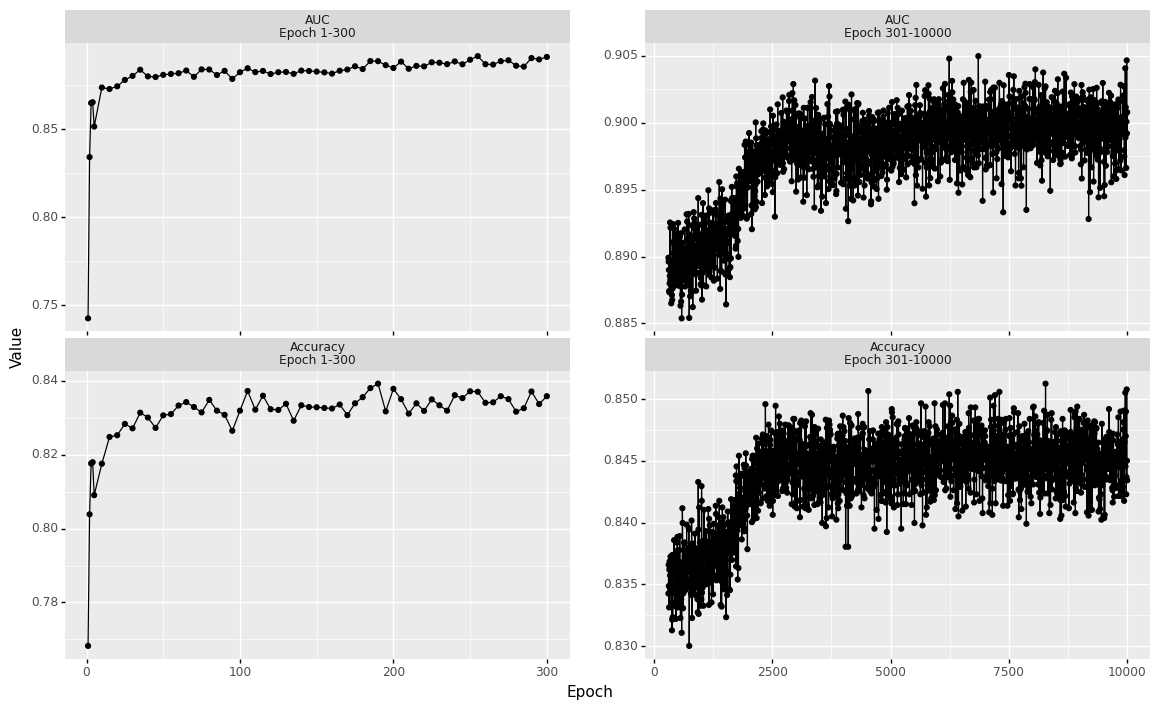

In [9]:
result_n_epochs = helpers.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.storage(),
    subfolder="",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = 1,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_n_epochs.svg",
    legend_pos="lower right",
    report_na=True,
    epoch_split=300,
    plot_separate=True
)

  0%|          | 0/10020 [00:00<?, ?it/s]

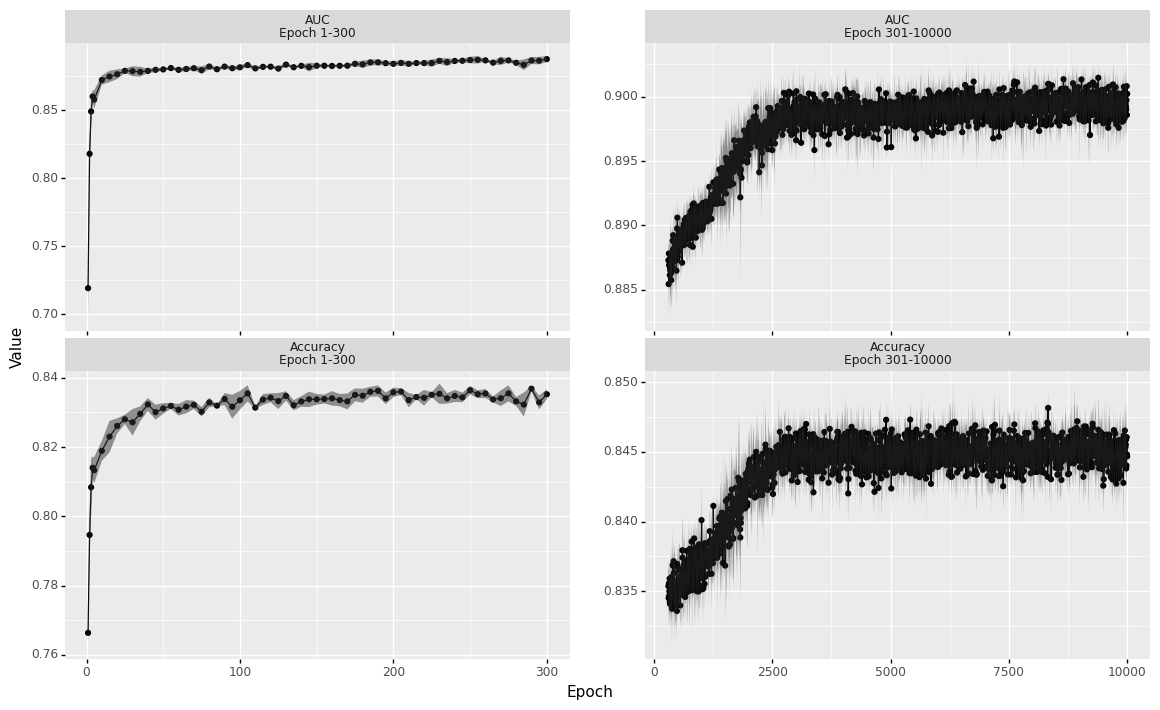

In [12]:
result_n_epochs = helpers.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.storage(),
    subfolder="",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_n_epochs_multiple_runs.svg",
    legend_pos="lower right",
    report_na=True,
    epoch_split=300,
    plot_separate=True
)

In [69]:
result_n_epochs.sort_values("Accuracy", ascending=False)

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
372,Epochs1895,0.845750,0.897177,0.0,0.0
373,Epochs1900,0.845286,0.898359,0.0,0.0
391,Epochs1990,0.844821,0.900264,0.0,0.0
392,Epochs1995,0.844489,0.899493,0.0,0.0
388,Epochs1975,0.844223,0.897855,0.0,0.0
...,...,...,...,...,...
30,Epochs185,0.830013,0.879182,0.0,0.0
3,Epochs50,0.830013,0.880664,0.0,0.0
2,Epochs45,0.829548,0.881182,0.0,0.0
8,Epochs75,0.829482,0.877949,0.0,0.0


In [367]:
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
n_synthetic_datasets_lr_comparison = 10
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_lr,
    hyperparams_vec=lr_vec,
    n_epochs=n_epochs_lr,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "learning_rate",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/20 [00:00<?, ?it/s]

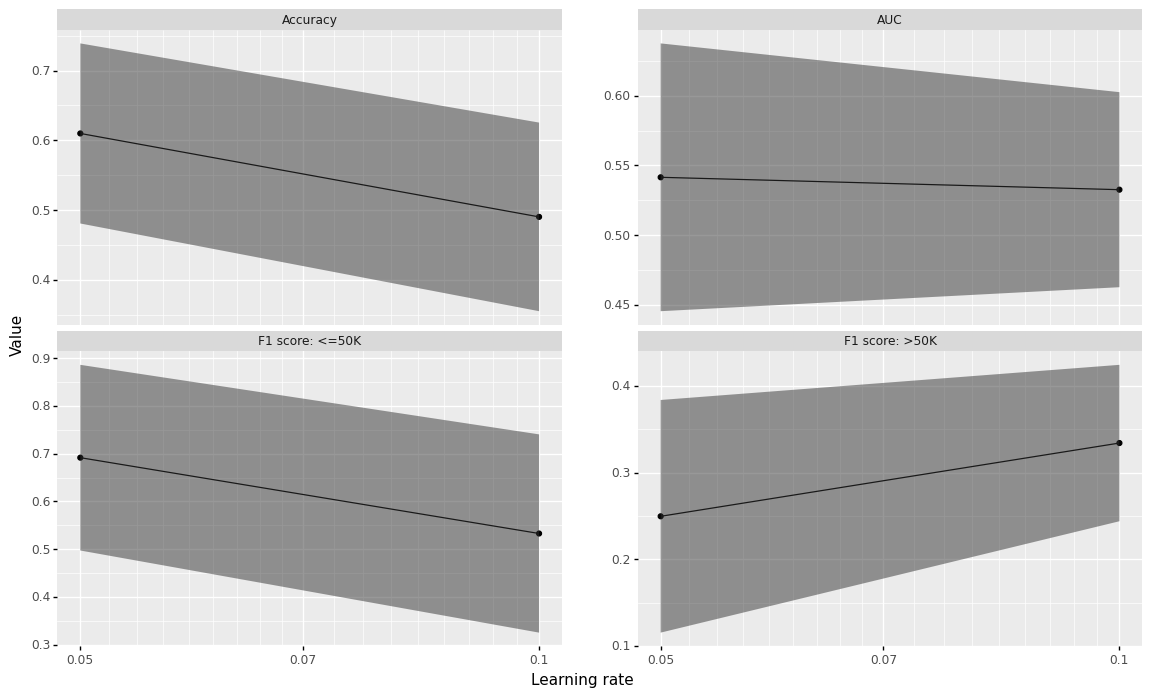

In [368]:
result_lr = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=lr_vec,
    hyperparams_name = "learning_rate",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_lr.svg",
    x_scale="log",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [369]:
result_lr

,Learning rate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.05,0.609854,0.541495,0.470685,0.691778,0.249593,0.128985,0.095981,0.065538,0.194609,0.134237
1,0.10,0.490325,0.532619,0.433470,0.532803,0.334137,0.135102,0.069910,0.079467,0.207799,0.090250


In [323]:
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
n_synthetic_datasets_adam_beta1_comparison = 10
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta1,
    hyperparams_vec=adam_beta1_vec,
    n_epochs=n_epochs_adam_beta1,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta1",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

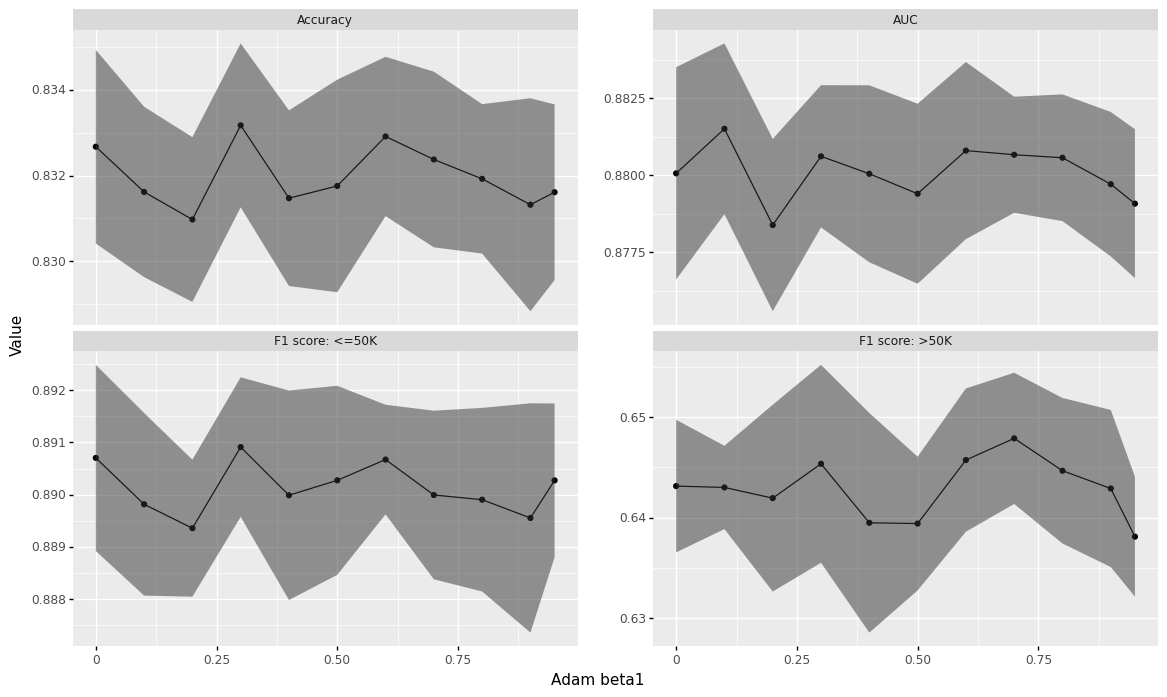

In [342]:
result_adam_beta1 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta1_vec,
    hyperparams_name = "adam_beta1",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_adam_beta1.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False,
)

In [99]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.832676,0.880065,0.766924,0.890703,0.643144,0.002259,0.003444,0.003479,0.001780,0.006597
1,0.10,0.831620,0.881511,0.766413,0.889816,0.643009,0.001988,0.002770,0.002079,0.001747,0.004144
2,0.20,0.830976,0.878388,0.765651,0.889358,0.641944,0.001922,0.002795,0.004752,0.001311,0.009291
3,0.30,0.833174,0.880618,0.768136,0.890910,0.645361,0.001913,0.002307,0.004966,0.001335,0.009845
4,0.40,0.831474,0.880051,0.764740,0.889989,0.639491,0.002050,0.002871,0.005054,0.002004,0.010925
5,0.50,0.831760,0.879404,0.764845,0.890274,0.639415,0.002481,0.002921,0.003744,0.001808,0.006651
6,0.60,0.832915,0.880804,0.768202,0.890671,0.645733,0.001859,0.002873,0.003941,0.001049,0.007123
7,0.70,0.832377,0.880669,0.768943,0.889993,0.647892,0.002050,0.001883,0.003398,0.001613,0.006527
8,0.80,0.831926,0.880572,0.767289,0.889904,0.644673,0.001744,0.002055,0.003216,0.001756,0.007239
9,0.90,0.831321,0.879713,0.766230,0.889554,0.642905,0.002485,0.002344,0.003820,0.002194,0.007814


In [48]:
adam_beta2_vec = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]
n_synthetic_datasets_adam_beta2_comparison = 10
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta2,
    hyperparams_vec=adam_beta2_vec,
    n_epochs=n_epochs_adam_beta2,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta2",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/120 [00:00<?, ?it/s]

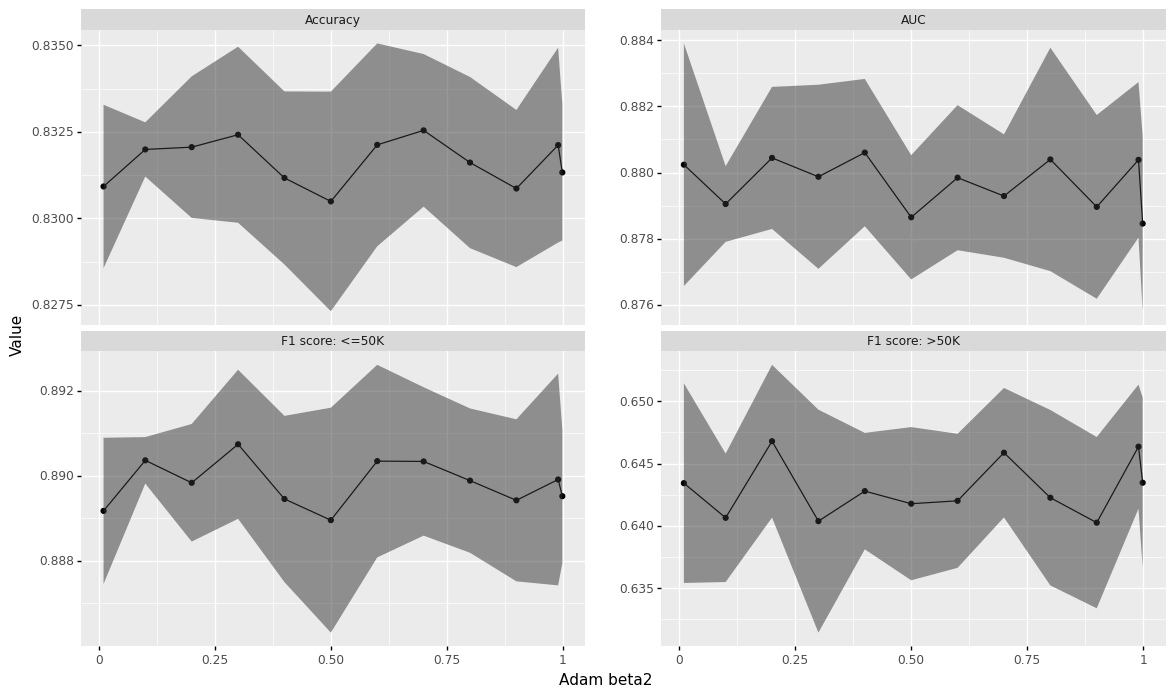

In [343]:
result_adam_beta2 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta2_vec,
    hyperparams_name = "adam_beta2",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_adam_beta2.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [50]:
result_adam_beta2

,Adam beta2,Value Accuracy,Value AUC,SD Accuracy,SD AUC
0,0.010,0.830923,0.880237,0.002359,0.003672
1,0.100,0.831992,0.879047,0.000783,0.001146
2,0.200,0.832058,0.880443,0.002044,0.002150
3,0.300,0.832417,0.879872,0.002542,0.002786
4,0.400,0.831169,0.880603,0.002499,0.002230
5,0.500,0.830491,0.878645,0.003171,0.001881
6,0.600,0.832125,0.879844,0.002930,0.002197
7,0.700,0.832543,0.879288,0.002204,0.001868
8,0.800,0.831614,0.880396,0.002472,0.003382
9,0.900,0.830863,0.878960,0.002269,0.002782


In [52]:
n_critic_vec = np.arange(1,26)
n_synthetic_datasets_n_critic_comparison = 10
n_epochs_n_critic = 100

def create_tabGAN_for_n_critic(n_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_critic,
    hyperparams_vec=n_critic_vec,
    n_epochs=n_epochs_n_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_critic_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/250 [00:00<?, ?it/s]

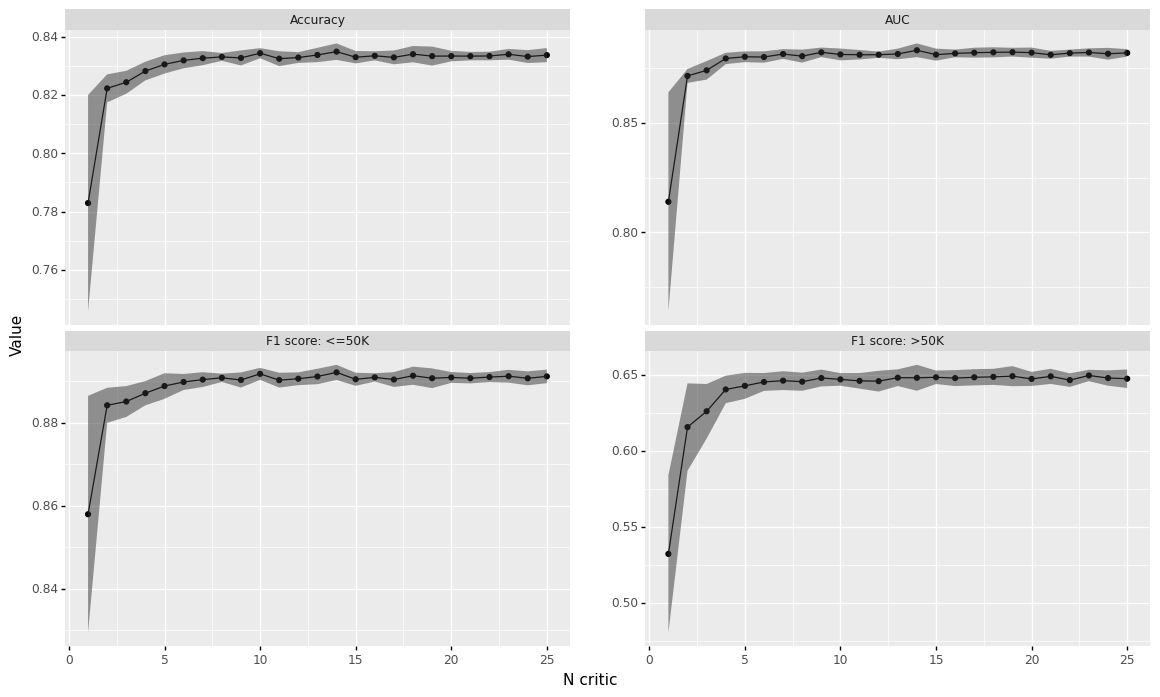

In [361]:
result_n_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_critic_vec,
    hyperparams_name = "n_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_critic_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_n_critic.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [22]:
#result_n_critic

In [362]:
qtr_spread_vec = np.round(np.linspace(0, 1, 21),2)
n_synthetic_datasets_qtr_spread_comparison = 10
n_epochs_qtr_spread = 100

def create_tabGAN_for_qtr_spread(qtr_spread):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_spread=qtr_spread)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_spread,
    hyperparams_vec=qtr_spread_vec,
    n_epochs=n_epochs_qtr_spread,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_spread_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_spread",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/210 [00:00<?, ?it/s]

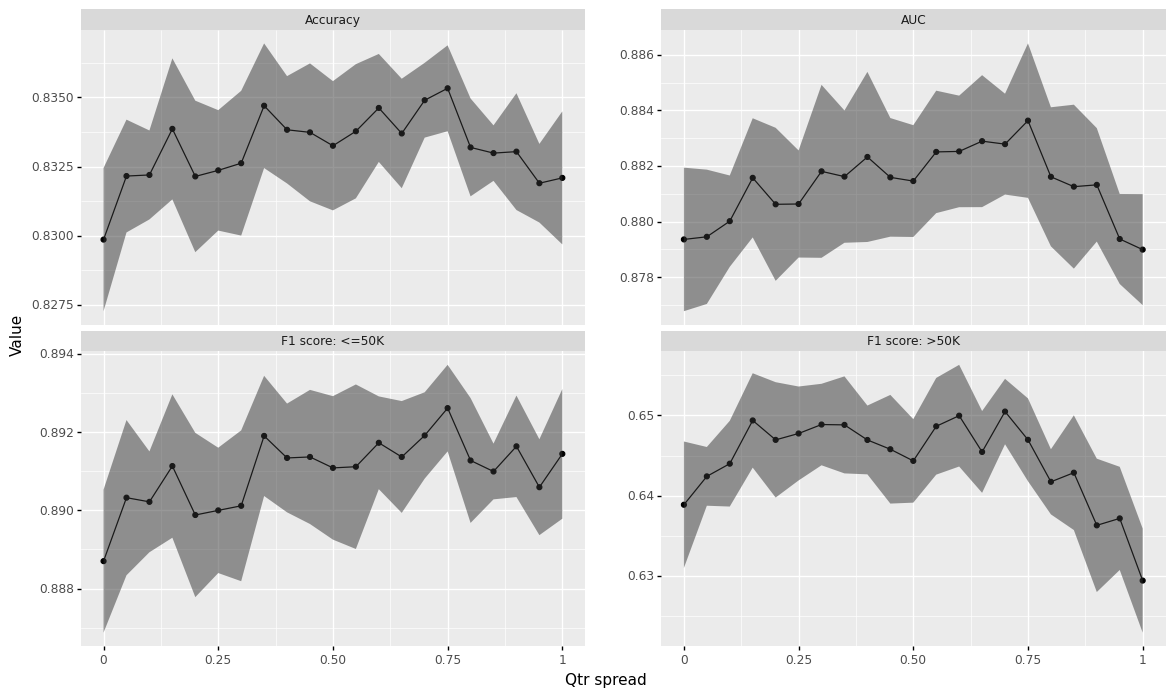

In [363]:
result_qtr_spread = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_spread_vec,
    hyperparams_name = "qtr_spread",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_spread_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_qtr_spread.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    report_na=True
)

In [73]:
#result_qtr_spread

In [ ]:
gumbel_temp_vec = np.round(np.linspace(0.001, 0.009, 9), 4).tolist()
gumbel_temp_vec += np.round(np.linspace(0.01, 0.19, 19), 3).tolist()
gumbel_temp_vec += np.round(np.linspace(0.2, 2, 19),2).tolist()
n_synthetic_datasets_gumbel_temp_comparison = 10
n_epochs_gumbel_temp = 100

def create_tabGAN_for_gumbel_temp(gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gumbel_temp,
    hyperparams_vec=gumbel_temp_vec,
    n_epochs=n_epochs_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gumbel_temp_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gumbel_temp",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/470 [00:00<?, ?it/s]

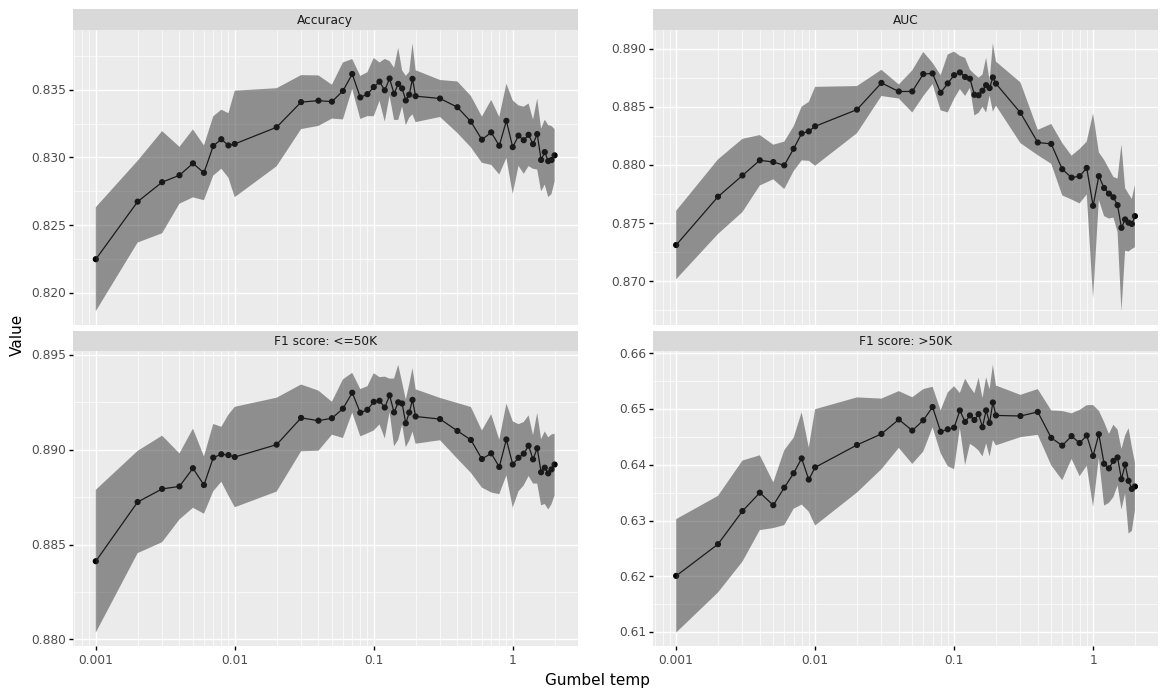

In [370]:
result_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gumbel_temp_vec,
    hyperparams_name = "gumbel_temp",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gumbel_temp_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_gumbel_temp.svg",
    x_scale="log",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [108]:
result_gumbel_temp

,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.001,0.822497,0.873120,0.752092,0.884121,0.620064,0.003831,0.002942,0.004170,0.003760,0.010180
1,0.002,0.826740,0.877271,0.756498,0.887239,0.625756,0.003013,0.003205,0.004146,0.002692,0.008672
2,0.003,0.828174,0.879098,0.759812,0.887928,0.631695,0.003766,0.003144,0.005196,0.002805,0.009068
3,0.004,0.828685,0.880402,0.761528,0.888060,0.634995,0.002097,0.002164,0.003379,0.001739,0.006711
4,0.005,0.829562,0.880253,0.760883,0.889019,0.632746,0.002505,0.001487,0.002336,0.002084,0.004103
5,0.006,0.828865,0.879967,0.762019,0.888133,0.635905,0.002019,0.002039,0.003553,0.001509,0.006724
6,0.007,0.830843,0.881390,0.764027,0.889577,0.638478,0.002186,0.001927,0.003290,0.001773,0.006373
7,0.008,0.831341,0.882705,0.765450,0.889753,0.641148,0.002177,0.002312,0.004444,0.001447,0.008287
8,0.009,0.830883,0.882885,0.763530,0.889709,0.637350,0.002381,0.002528,0.002743,0.002129,0.005759
9,0.010,0.830996,0.883322,0.764574,0.889608,0.639540,0.003925,0.003388,0.006130,0.002644,0.010435


In [371]:
qtr_lbound_apply_vec = np.round(np.linspace(0.02, 0.2, 10),2).tolist() + np.round(np.linspace(0.002, 0.01, 5),3).tolist()
n_synthetic_datasets_qtr_lbound_apply_comparison = 10
n_epochs_qtr_lbound_apply = 100

def create_tabGAN_for_qtr_lbound_apply(qtr_lbound_apply):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_lbound_apply=qtr_lbound_apply)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_lbound_apply,
    hyperparams_vec=qtr_lbound_apply_vec,
    n_epochs=n_epochs_qtr_lbound_apply,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_lbound_apply_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_lbound_apply",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

In [372]:
result_qtr_lbound_apply = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_lbound_apply_vec,
    hyperparams_name = "qtr_lbound_apply",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_lbound_apply_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_qtr_lbound_apply.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

TypeError: evaluate_hyperparams_through_prediction() got an unexpected keyword argument 'legend_pos'

In [19]:
result_qtr_lbound_apply

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,qtr_lbound_apply_0.02,0.831308,0.878738,0.002194,0.001968
1,qtr_lbound_apply_0.04,0.829973,0.879007,0.002470,0.002740
2,qtr_lbound_apply_0.06,0.830651,0.879398,0.002087,0.002500
3,qtr_lbound_apply_0.08,0.831494,0.881086,0.003265,0.002478
4,qtr_lbound_apply_0.1,0.833340,0.880582,0.002019,0.002217
5,qtr_lbound_apply_0.12,0.831939,0.879752,0.002440,0.002528
6,qtr_lbound_apply_0.14,0.832410,0.880455,0.002717,0.001844
7,qtr_lbound_apply_0.16,0.832337,0.879604,0.003058,0.002616
8,qtr_lbound_apply_0.18,0.831042,0.879423,0.001716,0.002343
9,qtr_lbound_apply_0.2,0.833293,0.879553,0.001578,0.002025


In [ ]:
dim_hidden_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_hidden_comparison = 10
n_epochs_dim_hidden = 100

def create_tabGAN_for_dim_hidden(dim_hidden):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_hidden=dim_hidden)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_hidden,
    hyperparams_vec=dim_hidden_vec,
    n_epochs=n_epochs_dim_hidden,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_hidden_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_hidden",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

In [ ]:
result_dim_hidden = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_hidden_vec,
    hyperparams_name = "dim_hidden",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_hidden_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dim_hidden.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [119]:
result_dim_hidden

,Dim hidden,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,16,0.809841,0.842751,0.722061,0.878112,0.566010,0.010797,0.014245,0.025516,0.005839,0.046288
1,32,0.820299,0.865542,0.748235,0.882915,0.613556,0.003889,0.007902,0.005757,0.002726,0.009822
2,64,0.825471,0.874459,0.758818,0.885587,0.632049,0.003392,0.003889,0.004659,0.002563,0.008165
3,96,0.827530,0.876789,0.761562,0.886968,0.636157,0.002802,0.003033,0.004509,0.001920,0.007832
4,128,0.829987,0.878267,0.763506,0.888874,0.638137,0.001554,0.003771,0.003173,0.001434,0.006758
5,192,0.830916,0.877959,0.766075,0.889223,0.642927,0.001975,0.002579,0.003002,0.001510,0.005529
6,256,0.832570,0.880928,0.768367,0.890304,0.646430,0.002199,0.002343,0.004291,0.001418,0.007839
7,384,0.833373,0.881955,0.767505,0.891246,0.643764,0.001628,0.002494,0.003586,0.001037,0.006748
8,512,0.832915,0.881405,0.768280,0.890649,0.645912,0.001675,0.001216,0.002471,0.001447,0.005005
9,786,0.833413,0.882599,0.768556,0.891056,0.646056,0.002041,0.002499,0.003622,0.001649,0.007143


In [ ]:
dim_latent_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_latent_comparison = 10
n_epochs_dim_latent = 100

def create_tabGAN_for_dim_latent(dim_latent):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_latent=dim_latent)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_latent,
    hyperparams_vec=dim_latent_vec,
    n_epochs=n_epochs_dim_latent,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_latent_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_latent",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_dim_latent = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_latent_vec,
    hyperparams_name = "dim_latent",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_latent_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dim_latent.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_dim_latent

In [ ]:
wgan_lambda_vec = np.arange(0,11, 1).tolist() + np.arange(12,21,2).tolist()
n_synthetic_datasets_wgan_lambda_comparison = 10
n_epochs_wgan_lambda = 100

def create_tabGAN_for_wgan_lambda(wgan_lambda):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     wgan_lambda=wgan_lambda)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_wgan_lambda,
    hyperparams_vec=wgan_lambda_vec,
    n_epochs=n_epochs_wgan_lambda,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_wgan_lambda_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "wgan_lambda",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_wgan_lambda = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=wgan_lambda_vec,
    hyperparams_name = "wgan_lambda",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_wgan_lambda_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_wgan_lambda.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_wgan_lambda

In [ ]:
n_quantiles_int_vec = [10, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000]
n_synthetic_datasets_n_quantiles_int_comparison = 10
n_epochs_n_quantiles_int = 100

def create_tabGAN_for_n_quantiles_int(n_quantiles_int):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_quantiles_int=n_quantiles_int)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_quantiles_int,
    hyperparams_vec=n_quantiles_int_vec,
    n_epochs=n_epochs_n_quantiles_int,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_quantiles_int_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_quantiles_int",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_n_quantiles_int = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_quantiles_int_vec,
    hyperparams_name = "n_quantiles_int",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_quantiles_int_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_n_quantiles_int.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [156]:
result_n_quantiles_int

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_quantiles_int_10,0.829947,0.877735,0.002236,0.002787
1,n_quantiles_int_50,0.830903,0.880001,0.002145,0.002495
2,n_quantiles_int_100,0.832012,0.880346,0.002294,0.001619
3,n_quantiles_int_250,0.831793,0.880850,0.001739,0.002662
4,n_quantiles_int_500,0.831819,0.880581,0.001504,0.001318
5,n_quantiles_int_750,0.832510,0.881768,0.001734,0.002435
6,n_quantiles_int_1000,0.832297,0.880441,0.002453,0.002387
7,n_quantiles_int_2500,0.831301,0.880570,0.002167,0.002551
8,n_quantiles_int_5000,0.832012,0.881770,0.002419,0.001583
9,n_quantiles_int_10000,0.831853,0.879547,0.003042,0.002606


In [126]:
n_hidden_layers_vec = [1,2,3,4,5]
n_synthetic_datasets_n_hidden_layers_comparison = 10
n_epochs_n_hidden_layers = 100

def create_tabGAN_for_n_hidden_layers(n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_hidden_layers=n_hidden_layers)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_hidden_layers,
    hyperparams_vec=n_hidden_layers_vec,
    n_epochs=n_epochs_n_hidden_layers,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_hidden_layers_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_hidden_layers",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
result_n_hidden_layers = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_hidden_layers_vec,
    hyperparams_name = "n_hidden_layers",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_hidden_layers_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_n_hidden_layers.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [128]:
result_n_hidden_layers

,N hidden layers,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,1,0.828333,0.878858,0.762096,0.887610,0.636582,0.003844,0.002336,0.004187,0.002969,0.006619
1,2,0.831109,0.880341,0.766952,0.889209,0.644695,0.002427,0.003012,0.003047,0.002052,0.005907
2,3,0.832869,0.880763,0.766171,0.891031,0.641312,0.001615,0.001954,0.002518,0.001674,0.005930
3,4,0.831315,0.880320,0.764278,0.889971,0.638584,0.002311,0.003483,0.004577,0.001498,0.008402
4,5,0.830173,0.883022,0.765304,0.888669,0.641940,0.002091,0.002865,0.003785,0.001731,0.007591


In [ ]:
batch_size_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_comparison = 10
n_epochs_batch_size = 100

def create_tabGAN_for_batch_size(batch_size):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size,
    hyperparams_vec=batch_size_vec,
    n_epochs=n_epochs_batch_size,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_batch_size = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_vec,
    hyperparams_name = "batch_size",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_batch_size.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
result_batch_size

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_50,0.830651,0.879375,0.001990,0.002466
1,batch_size_100,0.832158,0.881258,0.002571,0.002228
2,batch_size_250,0.832205,0.880385,0.002026,0.001474
3,batch_size_500,0.832629,0.880273,0.001958,0.002155
4,batch_size_750,0.830551,0.878902,0.002951,0.003343
5,batch_size_1000,0.832610,0.879210,0.001694,0.002683
6,batch_size_2500,0.832995,0.881987,0.001332,0.002664
7,batch_size_5000,0.831069,0.878514,0.003233,0.002665


In [ ]:
batch_size_300_epochs_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_300_epochs_comparison = 10
n_epochs_batch_size_300_epochs = 300

def create_tabGAN_for_batch_size_300_epochs(batch_size_300_epochs):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size_300_epochs)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size_300_epochs,
    hyperparams_vec=batch_size_300_epochs_vec,
    n_epochs=n_epochs_batch_size_300_epochs,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_300_epochs_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size_300_epochs",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_batch_size_300_epochs = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_300_epochs_vec,
    hyperparams_name = "batch_size_300_epochs",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_300_epochs_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_batch_size_300_epochs.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [34]:
result_batch_size_300_epochs

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_300_epochs_50,0.809582,0.854027,0.005570,0.011016
1,batch_size_300_epochs_100,0.820644,0.869345,0.003997,0.005666
2,batch_size_300_epochs_250,0.829708,0.881534,0.001874,0.001723
3,batch_size_300_epochs_500,0.835212,0.885538,0.002576,0.002384
4,batch_size_300_epochs_750,0.834575,0.885291,0.001570,0.003145
5,batch_size_300_epochs_1000,0.834057,0.882949,0.002208,0.002097
6,batch_size_300_epochs_2500,0.833127,0.881454,0.001977,0.002128
7,batch_size_300_epochs_5000,0.830797,0.878849,0.001753,0.002872


In [ ]:
noise_discrete_unif_max_vec = np.round(np.arange(0, 0.41, 0.01), 3).tolist() + [0.005]
n_synthetic_datasets_noise_discrete_unif_max_comparison = 10
n_epochs_noise_discrete_unif_max = 100

def create_tabGAN_for_noise_discrete_unif_max(noise_discrete_unif_max):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_discrete_unif_max,
    hyperparams_vec=noise_discrete_unif_max_vec,
    n_epochs=n_epochs_noise_discrete_unif_max,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_discrete_unif_max_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "noise_discrete_unif_max",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=False
)

In [ ]:
result_noise_discrete_unif_max = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_discrete_unif_max_vec,
    hyperparams_name = "noise_discrete_unif_max",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_discrete_unif_max_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_noise_discrete_unif_max.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [17]:
result_noise_discrete_unif_max

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,noise_discrete_unif_max_0.0,0.831541,0.881006,0.002210,0.002679
1,noise_discrete_unif_max_0.005,0.832510,0.881329,0.002429,0.003116
2,noise_discrete_unif_max_0.01,0.832410,0.879142,0.002020,0.003825
3,noise_discrete_unif_max_0.02,0.831786,0.881082,0.003554,0.001996
4,noise_discrete_unif_max_0.03,0.832722,0.881374,0.001627,0.002484
5,noise_discrete_unif_max_0.04,0.832829,0.881153,0.001878,0.003269
6,noise_discrete_unif_max_0.05,0.833977,0.881751,0.002682,0.002539
7,noise_discrete_unif_max_0.06,0.833320,0.881659,0.001715,0.001899
8,noise_discrete_unif_max_0.07,0.833353,0.882804,0.002066,0.002121
9,noise_discrete_unif_max_0.08,0.833612,0.883500,0.002155,0.001562


In [ ]:
adam_beta1_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
adam_beta2_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
amsgrad_vec_partial = [False, True]
adam_betas_vec = [(beta1, beta2, amsgrad) for beta1 in adam_beta1_vec_partial for beta2 in adam_beta2_vec_partial
                  for amsgrad in amsgrad_vec_partial]
n_synthetic_datasets_adam_betas_comparison = 10
n_epochs_adam_betas = 100

def create_tabGAN_for_adam_betas(adam_beta1, adam_beta2, adam_amsgrad):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1, adam_amsgrad=adam_amsgrad,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr
small_adam_betas_vec = (0.5, 0.5, True), (0.5, 0.7, False), (0.5, 0.7, True), (0.5, 0.9, False)

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_betas,
    hyperparams_vec=adam_betas_vec,
    n_epochs=n_epochs_adam_betas,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_betas_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_adam_betas = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= adam_betas_vec,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_betas_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_adam_betas.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_1$", r"$\beta_2$", "Amsgrad"]
)

In [159]:
result_adam_betas.sort_values("Value Accuracy", ascending=False)

,$\beta_1$,$\beta_2$,Amsgrad,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
73,0.9,0.100,True,0.822563,0.875028,0.756113,0.883372,0.628854,0.002740,0.002614,0.003771,0.002614,0.008289
77,0.9,0.500,True,0.823911,0.877136,0.758773,0.884091,0.633456,0.003612,0.002039,0.004045,0.003070,0.007458
70,0.9,0.010,False,0.824263,0.865221,0.751096,0.885996,0.616196,0.003621,0.004092,0.005541,0.003039,0.011051
71,0.9,0.010,True,0.824296,0.875560,0.755245,0.885218,0.625272,0.002851,0.001375,0.004817,0.002244,0.009327
59,0.7,0.100,True,0.824960,0.875857,0.758456,0.885190,0.631723,0.002727,0.002807,0.004099,0.001898,0.006968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.1,0.300,False,0.833466,0.882018,0.768740,0.891082,0.646398,0.002143,0.002287,0.003441,0.001405,0.005835
26,0.1,0.999,False,0.833466,0.881036,0.769193,0.890967,0.647418,0.002680,0.002152,0.003844,0.002174,0.007360
41,0.3,0.999,True,0.833745,0.880172,0.768461,0.891394,0.645528,0.001756,0.002747,0.003324,0.001340,0.006449
2,0.0,0.100,False,0.833778,0.881768,0.770175,0.891064,0.649285,0.001910,0.002389,0.002304,0.001677,0.004653


In [ ]:
sgd_momentum_vec_partial = np.round(np.linspace(0, 0.9, 10), 2).tolist() + [0.95, 0.99]
sgd_nesterov_vec_partial = [False, True]
sgd_vec = [(sgd_momentum, sgd_nesterov) for sgd_momentum in sgd_momentum_vec_partial for sgd_nesterov in sgd_nesterov_vec_partial]
n_synthetic_datasets_sgd_comparison = 10
n_epochs_sgd = 100

def create_tabGAN_for_sgd(sgd_momentum, sgd_nesterov):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="sgd", opt_lr = opt_lr, sgd_momentum=sgd_momentum,
                      sgd_nesterov=sgd_nesterov, quantile_transformation_int = True,
                      quantile_rand_transformation = True, noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_sgd,
    hyperparams_vec=sgd_vec,
    n_epochs=n_epochs_sgd,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_sgd_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_sgd = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=sgd_vec,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_sgd_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_sgd.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [158]:
result_sgd

,Momentum $=$,Nesterov $=$,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,False,0.751135,0.526847,0.470161,0.855964,0.084358,0.004951,0.062246,0.020328,0.002890,0.039709
1,0.00,True,0.752238,0.551071,0.473717,0.856545,0.090888,0.005914,0.055783,0.026773,0.002744,0.050986
2,0.10,False,0.753340,0.548218,0.473128,0.857338,0.088918,0.004187,0.042126,0.018465,0.002283,0.035822
3,0.10,True,0.752503,0.518531,0.462547,0.857298,0.067796,0.004118,0.071139,0.017866,0.001999,0.033952
4,0.20,False,0.755385,0.584125,0.475798,0.858617,0.092980,0.005078,0.043782,0.017213,0.002790,0.032408
5,0.20,True,0.753991,0.556335,0.467189,0.858090,0.076288,0.004633,0.061899,0.016270,0.002484,0.030553
6,0.30,False,0.756076,0.565651,0.474945,0.859088,0.090803,0.005562,0.079834,0.031103,0.002275,0.060140
7,0.30,True,0.754907,0.570211,0.480109,0.858062,0.102157,0.006769,0.057035,0.021272,0.003827,0.039921
8,0.40,False,0.760770,0.658533,0.510466,0.860488,0.160443,0.006529,0.039489,0.022890,0.003417,0.042946
9,0.40,True,0.756892,0.639250,0.492678,0.858776,0.126580,0.005739,0.057560,0.020393,0.003033,0.038386


In [330]:
rmsprop_rho_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
rmsprop_momentum_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
rmsprop_centered_vec_partial = [False, True]
rmsprop_vec = [(rho, momentum, centered) for rho in rmsprop_rho_vec_partial for momentum in rmsprop_momentum_vec_partial
                  for centered in rmsprop_centered_vec_partial]
n_synthetic_datasets_rmsprop_comparison = 10
n_epochs_rmsprop = 100

def create_tabGAN_for_rmsprop(rmsprop_rho, rmsprop_momentum, rmsprop_centered):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, rmsprop_rho = rmsprop_rho, rmsprop_centered=rmsprop_centered,
                      rmsprop_momentum=rmsprop_momentum, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_rmsprop,
    hyperparams_vec=rmsprop_vec,
    n_epochs=n_epochs_rmsprop,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_rmsprop_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/980 [00:00<?, ?it/s]

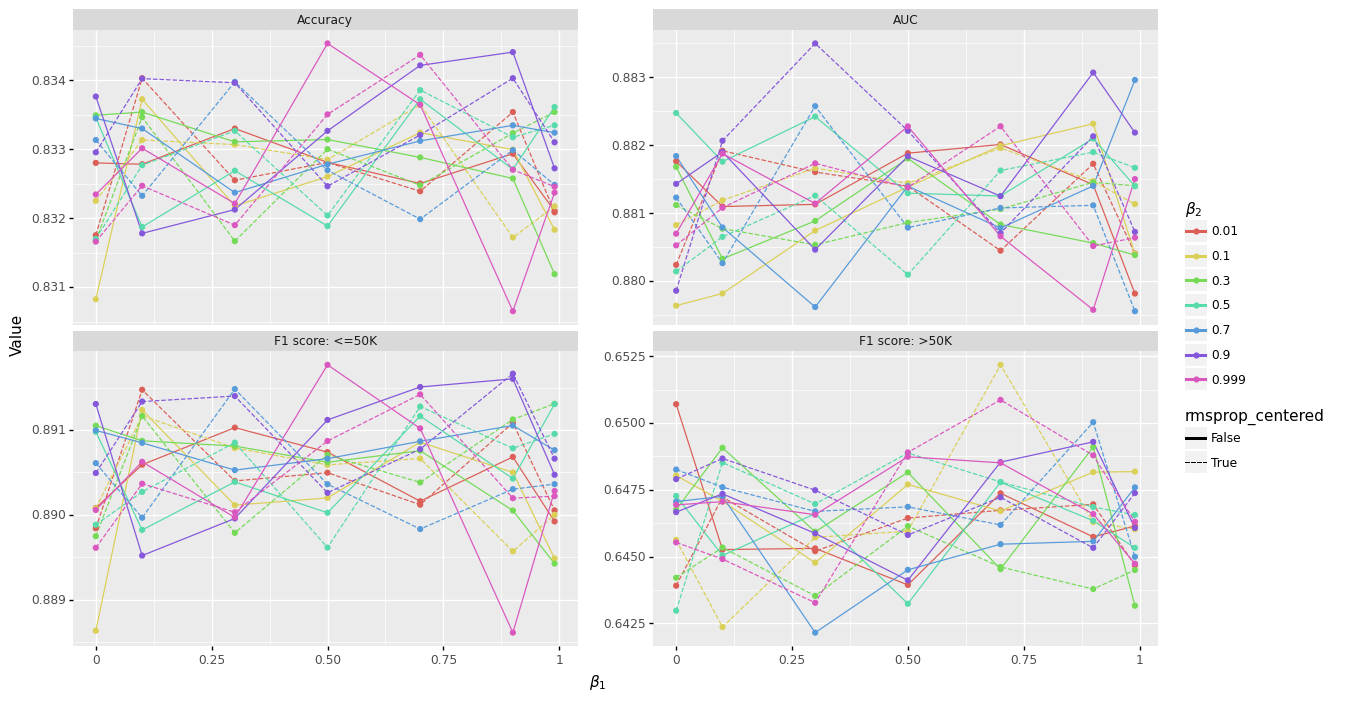

In [341]:
result_rmsprop = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= rmsprop_vec,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_rmsprop_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_rmsprop.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_1$", r"$\beta_2$", "rmsprop_centered"]
)

In [187]:
result_rmsprop.sort_values("Value Accuracy")

,$\beta_1$,$\beta_2$,rmsprop_centered,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
2,0.00,0.1,False,0.830823,0.879638,0.768335,0.888635,0.648035,0.001683,0.001588,0.002336,0.001591,0.005092
87,0.99,0.3,False,0.831189,0.880383,0.766293,0.889426,0.643159,0.002235,0.001678,0.002731,0.001957,0.005539
13,0.00,0.999,True,0.831660,0.880526,0.767571,0.889613,0.645530,0.002324,0.001985,0.004047,0.001517,0.007116
33,0.30,0.3,True,0.831667,0.880534,0.766658,0.889789,0.643528,0.002337,0.003348,0.003926,0.002094,0.008159
5,0.00,0.3,True,0.831673,0.881119,0.766978,0.889749,0.644208,0.001943,0.001938,0.003656,0.001356,0.006815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.10,0.01,True,0.834031,0.881919,0.769350,0.891474,0.647226,0.003048,0.002742,0.003069,0.002475,0.005168
66,0.70,0.9,False,0.834216,0.881251,0.770022,0.891507,0.648538,0.001613,0.002280,0.003541,0.001350,0.007223
69,0.70,0.999,True,0.834369,0.882279,0.771144,0.891420,0.650869,0.001248,0.001170,0.003294,0.000931,0.006611
80,0.90,0.9,False,0.834409,0.883070,0.770449,0.891603,0.649296,0.002161,0.001969,0.002248,0.001897,0.004522


In [ ]:
gan_architecture_dim_hidden_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_dim_latent_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_n_hidden_layers = [2]
gan_architecture_vec = [(dim_hidden, dim_latent, n_hidden_layers)
                        for dim_hidden in gan_architecture_dim_hidden_vec_partial
                        for dim_latent in gan_architecture_dim_latent_vec_partial
                        for n_hidden_layers in gan_architecture_n_hidden_layers]
n_synthetic_datasets_gan_architecture_comparison = 10
n_epochs_gan_architecture = 100

def create_tabGAN_for_gan_architecture(dim_hidden, dim_latent, n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    dim_hidden=dim_hidden, dim_latent=dim_latent, n_hidden_layers = n_hidden_layers,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gan_architecture,
    hyperparams_vec=gan_architecture_vec,
    n_epochs=n_epochs_gan_architecture,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gan_architecture_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

In [ ]:
result_gan_architecture = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gan_architecture_vec,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gan_architecture_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_gan_architecture.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= ["dim_hidden", "dim_latent", "n_hidden_layers"],
)

In [184]:
result_gan_architecture

,dim_hidden,dim_latent,factor(n_hidden_layers),Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,16,16,2,0.807211,0.845889,0.729667,0.874434,0.584899,0.005862,0.008116,0.009949,0.003651,0.016817
1,16,32,2,0.810598,0.850394,0.736625,0.876142,0.597107,0.008678,0.008151,0.007591,0.006849,0.009974
2,16,64,2,0.809555,0.849917,0.727187,0.877041,0.577333,0.008625,0.010773,0.013618,0.005752,0.023003
3,16,96,2,0.812171,0.851599,0.733546,0.878217,0.588876,0.008107,0.009095,0.013083,0.005557,0.022733
4,16,128,2,0.811494,0.851382,0.732317,0.877851,0.586784,0.006736,0.007373,0.009127,0.004870,0.015436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1024,256,2,0.833479,0.884801,0.768149,0.891198,0.645099,0.001995,0.002575,0.003597,0.001732,0.007421
117,1024,384,2,0.834203,0.885551,0.769332,0.891643,0.647022,0.001840,0.002090,0.004114,0.001271,0.007931
118,1024,512,2,0.833420,0.883056,0.767004,0.891373,0.642635,0.003222,0.001539,0.004312,0.002587,0.008046
119,1024,768,2,0.833220,0.881923,0.766334,0.891279,0.641390,0.002613,0.002845,0.006132,0.002498,0.013140


In [ ]:
noise_discrete_unif_max_vec_partial = np.arange(0, 0.21, 0.01).tolist() + [0.001, 0.003, 0.005, 0.007, 0.015, 0.025]
gumbel_temp_vec_partial = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]
noise_and_gumbel_temp_vec = [(noise_discrete_unif_max, gumbel_temp)
                        for noise_discrete_unif_max in noise_discrete_unif_max_vec_partial
                        for gumbel_temp in gumbel_temp_vec_partial]
n_synthetic_datasets_noise_and_gumbel_temp_comparison = 10
n_epochs_noise_and_gumbel_temp = 100

def create_tabGAN_for_noise_and_gumbel_temp(noise_discrete_unif_max, gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max,
                   gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_and_gumbel_temp,
    hyperparams_vec=noise_and_gumbel_temp_vec,
    n_epochs=n_epochs_noise_and_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/1890 [00:00<?, ?it/s]

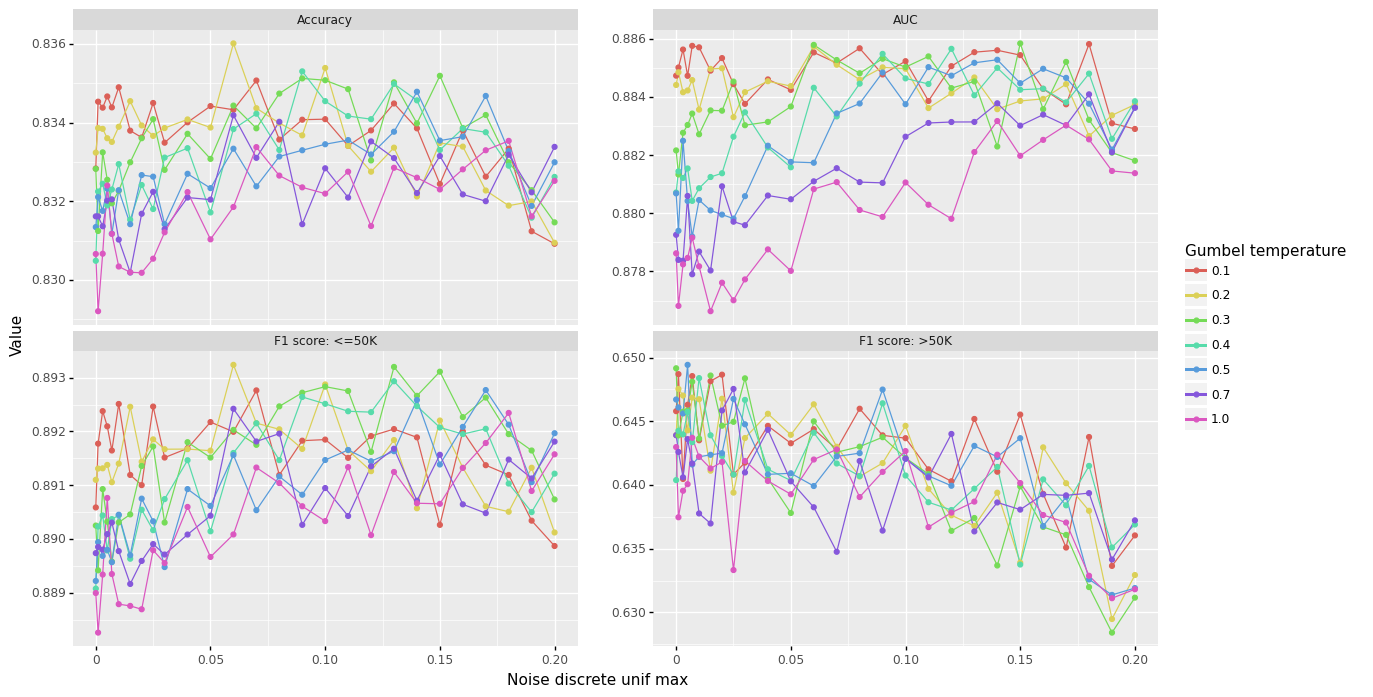

In [196]:
result_noise_and_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_and_gumbel_temp_vec,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_noise_and_gumbel_temp.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= ["Noise discrete unif max", "Gumbel temperature"],
    drop_na=False,
    report_na=False,
)

In [357]:
result_noise_and_gumbel_temp.loc[result_noise_and_gumbel_temp["Gumbel temperature"].astype("float") < 0.2, :]

,Noise discrete unif max,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.000,0.1,0.832835,0.884735,0.768188,0.890587,0.645789,0.001779,0.002387,0.001957,0.001730,0.004608
7,0.001,0.1,0.834535,0.885016,0.770234,0.891773,0.648696,0.002136,0.002240,0.002309,0.001748,0.004093
14,0.003,0.1,0.834382,0.885634,0.766424,0.892378,0.640471,0.002295,0.002423,0.005966,0.001665,0.011867
21,0.005,0.1,0.834668,0.884730,0.769193,0.892095,0.646291,0.002457,0.003381,0.004098,0.002082,0.008256
28,0.007,0.1,0.834389,0.885761,0.770094,0.891646,0.648543,0.002000,0.001931,0.004052,0.001741,0.008398
35,0.010,0.1,0.834900,0.885710,0.768008,0.892511,0.643505,0.003548,0.001735,0.002863,0.003550,0.007668
42,0.015,0.1,0.833798,0.884908,0.769668,0.891191,0.648144,0.002862,0.002441,0.004397,0.002052,0.007737
49,0.020,0.1,0.833625,0.885340,0.769828,0.891002,0.648654,0.002355,0.001791,0.003340,0.001650,0.005544
56,0.025,0.1,0.834502,0.884442,0.766642,0.892463,0.640822,0.001622,0.001775,0.002594,0.001555,0.005793
63,0.030,0.1,0.833493,0.883764,0.766635,0.891514,0.641756,0.002179,0.002147,0.004778,0.001734,0.009578


In [195]:
result_noise_and_gumbel_temp.sort_values("Value AUC", ascending=False)

,Noise discrete unif max,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
149,0.150,0.3,0.835193,0.885845,0.766498,0.893111,0.639886,0.002878,0.001538,0.004925,0.002387,0.009867
168,0.180,0.1,0.833340,0.885822,0.767477,0.891191,0.643762,0.002174,0.001533,0.004728,0.001895,0.009859
86,0.060,0.3,0.834436,0.885794,0.768510,0.892029,0.644991,0.002873,0.003177,0.004399,0.002126,0.007918
28,0.007,0.1,0.834389,0.885761,0.770094,0.891646,0.648543,0.002000,0.001931,0.004052,0.001741,0.008398
85,0.060,0.2,0.836016,0.885739,0.769783,0.893238,0.646328,0.002061,0.001130,0.004018,0.001761,0.008297
...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.030,1.0,0.831215,0.877726,0.765718,0.889553,0.641882,0.002976,0.002504,0.005560,0.002331,0.010867
55,0.020,1.0,0.830186,0.877613,0.765249,0.888694,0.641805,0.003441,0.004131,0.005022,0.002533,0.008859
62,0.025,1.0,0.830544,0.877008,0.761556,0.889792,0.633321,0.001422,0.002686,0.004197,0.001121,0.008606
13,0.001,1.0,0.829210,0.876815,0.762861,0.888260,0.637463,0.002438,0.001815,0.003995,0.002197,0.008425


In [197]:
leaky_relu_alpha_vec = np.round(np.arange(0, 1.01, 0.05),2).tolist()
n_synthetic_datasets_leaky_relu_alpha_comparison = 10
n_epochs_leaky_relu_alpha = 10

def create_tabGAN_for_leaky_relu_alpha(leaky_relu_alpha):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                    #leaky_relu_alpha=leaky_relu_alpha,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                   )
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_leaky_relu_alpha,
    hyperparams_vec=leaky_relu_alpha_vec,
    n_epochs=n_epochs_leaky_relu_alpha,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_leaky_relu_alpha_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "leaky_relu_alpha",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/210 [00:00<?, ?it/s]

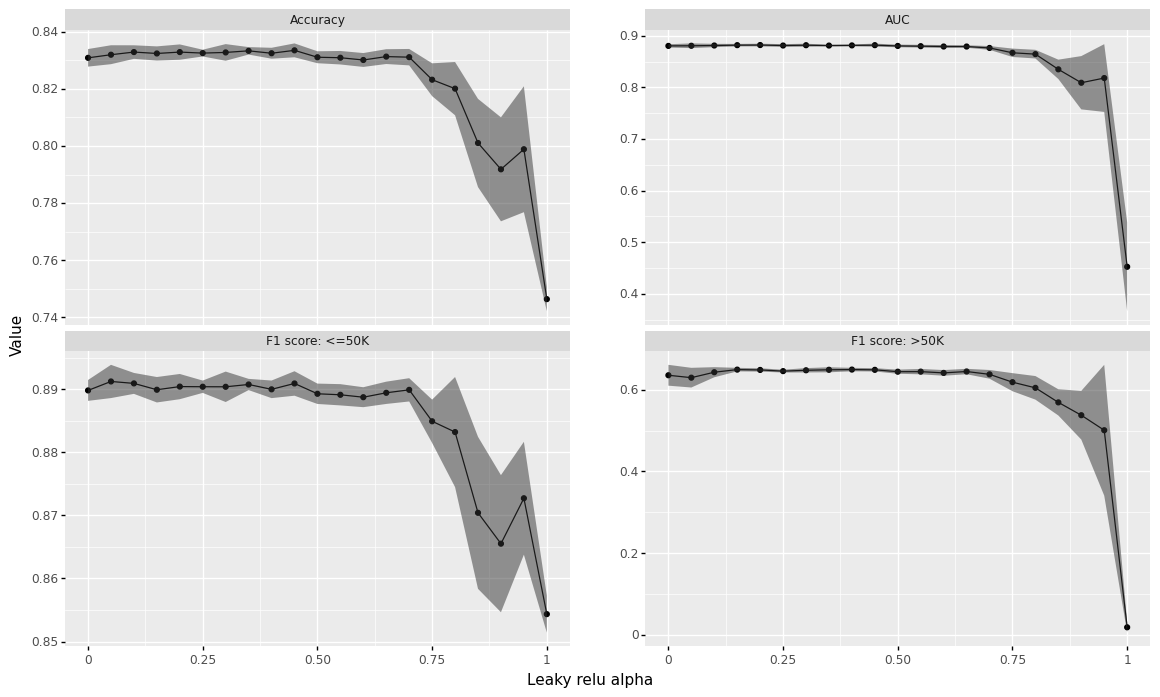

In [200]:
result_leaky_relu_alpha = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=leaky_relu_alpha_vec,
    hyperparams_name = "leaky_relu_alpha",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_leaky_relu_alpha_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_leaky_relu_alpha.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    print_csv_file_paths=False
)

In [201]:
result_leaky_relu_alpha

,Leaky relu alpha,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.830870,0.880328,0.762526,0.889794,0.635259,0.003076,0.003199,0.012756,0.001654,0.025478
1,0.05,0.831959,0.880609,0.760283,0.891214,0.629352,0.003313,0.004562,0.011733,0.002634,0.024071
2,0.10,0.832888,0.881096,0.766794,0.890907,0.642680,0.002372,0.003230,0.006258,0.001658,0.012371
3,0.15,0.832397,0.881759,0.769474,0.889901,0.649046,0.002483,0.002434,0.002575,0.002016,0.004347
4,0.20,0.832882,0.881976,0.769332,0.890402,0.648262,0.002684,0.002586,0.002848,0.001999,0.004050
5,0.25,0.832530,0.881065,0.767866,0.890379,0.645352,0.001185,0.002672,0.001755,0.000977,0.003427
6,0.30,0.832762,0.881652,0.768888,0.890368,0.647408,0.002911,0.002880,0.003007,0.002411,0.005313
7,0.35,0.833320,0.880978,0.769692,0.890736,0.648648,0.001306,0.001741,0.003159,0.000891,0.006165
8,0.40,0.832477,0.881292,0.769556,0.889966,0.649145,0.001912,0.001935,0.002548,0.001393,0.004235
9,0.45,0.833493,0.881736,0.769713,0.890896,0.648531,0.002429,0.002969,0.002479,0.001939,0.004024


In [202]:
dropout_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout_rate_critic_comparison = 10
n_epochs_dropout_rate_critic = 100

def create_tabGAN_for_dropout_rate_critic(dropout_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[2], dropout_rate_critic=dropout_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout_rate_critic,
    hyperparams_vec=dropout_rate_critic_vec,
    n_epochs=n_epochs_dropout_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/420 [00:00<?, ?it/s]

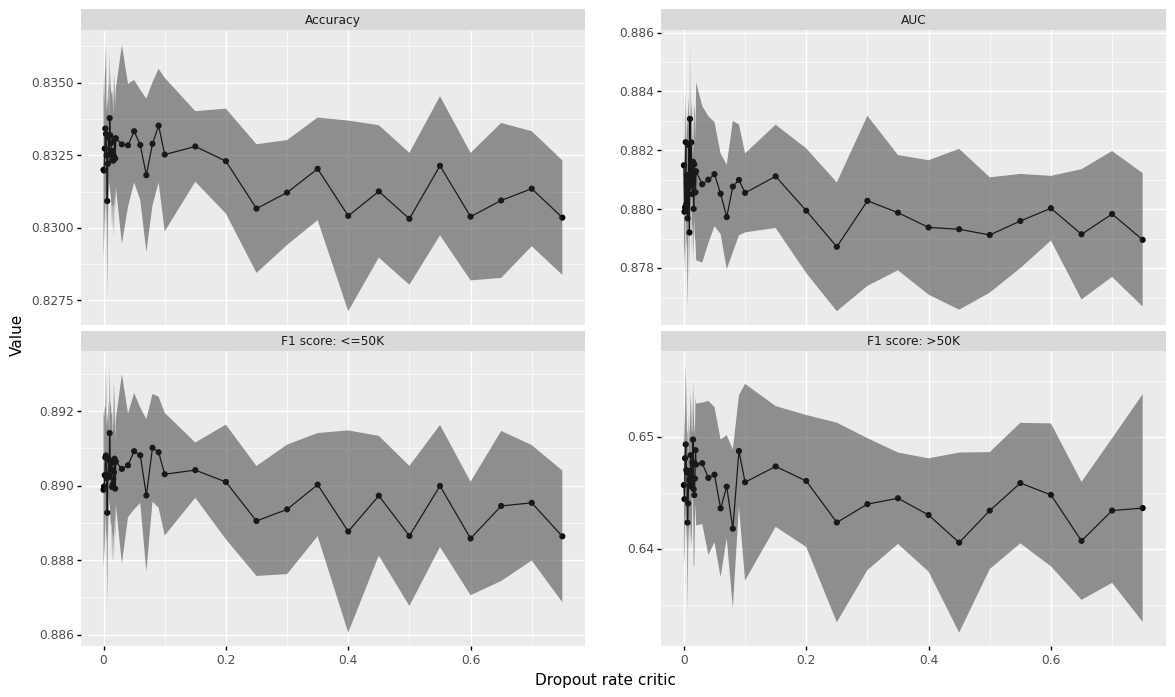

In [204]:
result_dropout_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout_rate_critic_vec,
    hyperparams_name = "dropout_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout_rate_critic_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dropout_rate_critic.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    report_na=True
)

In [208]:
result_dropout_rate_critic

,Dropout rate critic,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.000,0.831999,0.881492,0.767799,0.889891,0.645708,0.003156,0.002684,0.004464,0.002111,0.007078
1,0.001,0.831972,0.879913,0.767217,0.889981,0.644454,0.002316,0.001495,0.002750,0.001867,0.004926
2,0.002,0.832729,0.880064,0.769191,0.890284,0.648098,0.002475,0.002299,0.002938,0.001858,0.004728
3,0.003,0.833420,0.882276,0.770045,0.890759,0.649331,0.002165,0.001772,0.004045,0.001297,0.007090
4,0.004,0.833234,0.880175,0.768929,0.890811,0.647046,0.003118,0.001507,0.003813,0.002385,0.006438
5,0.005,0.832497,0.881160,0.768512,0.890205,0.646820,0.001489,0.002222,0.001821,0.001349,0.003837
6,0.006,0.830923,0.879688,0.765820,0.889274,0.642365,0.003311,0.003015,0.004534,0.002506,0.007962
7,0.007,0.832205,0.880689,0.767151,0.890223,0.644079,0.002273,0.002749,0.002714,0.001660,0.004191
8,0.008,0.833108,0.882179,0.768832,0.890719,0.646946,0.002087,0.001604,0.002935,0.001567,0.005165
9,0.009,0.832510,0.879209,0.768231,0.890285,0.646177,0.001220,0.001478,0.002010,0.000869,0.003622


In [205]:
dropout_rate_generator_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() +\
                             np.round(np.arange(0, 0.1, 0.01), 2).tolist()
n_synthetic_datasets_dropout_rate_generator_comparison = 10
n_epochs_dropout_rate_generator = 100

def create_tabGAN_for_dropout_rate_generator(dropout_rate_generator):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_generator=[2], dropout_rate_generator=dropout_rate_generator)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout_rate_generator,
    hyperparams_vec=dropout_rate_generator_vec,
    n_epochs=n_epochs_dropout_rate_generator,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout_rate_generator_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout_rate_generator",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/240 [00:00<?, ?it/s]

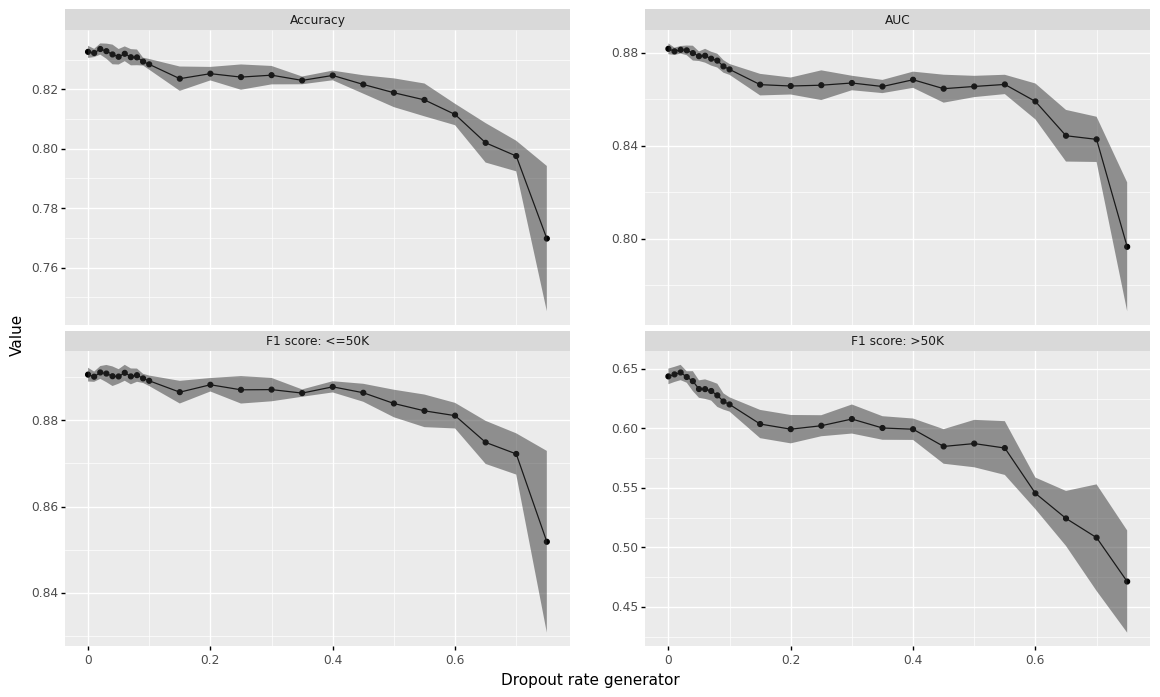

In [207]:
result_dropout_rate_generator = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout_rate_generator_vec,
    hyperparams_name = "dropout_rate_generator",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout_rate_generator_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dropout_rate_generator.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [209]:
result_dropout_rate_generator

,Dropout rate generator,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.832616,0.881752,0.767166,0.890597,0.643734,0.002040,0.002329,0.003399,0.001601,0.006560
1,0.01,0.832238,0.880670,0.767766,0.890113,0.645418,0.001388,0.001567,0.003086,0.001181,0.006360
2,0.02,0.833566,0.881323,0.769055,0.891100,0.647009,0.001890,0.001631,0.003327,0.001481,0.006441
3,0.03,0.832842,0.881081,0.767034,0.890842,0.643226,0.002543,0.002083,0.002866,0.001997,0.004814
4,0.04,0.831740,0.879896,0.764990,0.890226,0.639754,0.003311,0.003191,0.004972,0.002271,0.008384
5,0.05,0.830956,0.878555,0.761637,0.890174,0.633099,0.002611,0.002057,0.004317,0.001681,0.007338
6,0.06,0.831965,0.878772,0.762024,0.891019,0.633028,0.002486,0.002979,0.004360,0.001847,0.008214
7,0.07,0.830803,0.877498,0.760827,0.890186,0.631469,0.002733,0.002980,0.004584,0.001839,0.008048
8,0.08,0.830757,0.876668,0.759140,0.890468,0.627812,0.002642,0.002984,0.005442,0.001536,0.009744
9,0.09,0.829336,0.874173,0.756184,0.889721,0.622646,0.001323,0.002713,0.003353,0.001059,0.006828


In [210]:
dropout1_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout1_rate_critic_comparison = 10
n_epochs_dropout1_rate_critic = 100

def create_tabGAN_for_dropout1_rate_critic(dropout1_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[1], dropout_rate_critic=dropout1_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout1_rate_critic,
    hyperparams_vec=dropout1_rate_critic_vec,
    n_epochs=n_epochs_dropout1_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout1_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout1_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/420 [00:00<?, ?it/s]

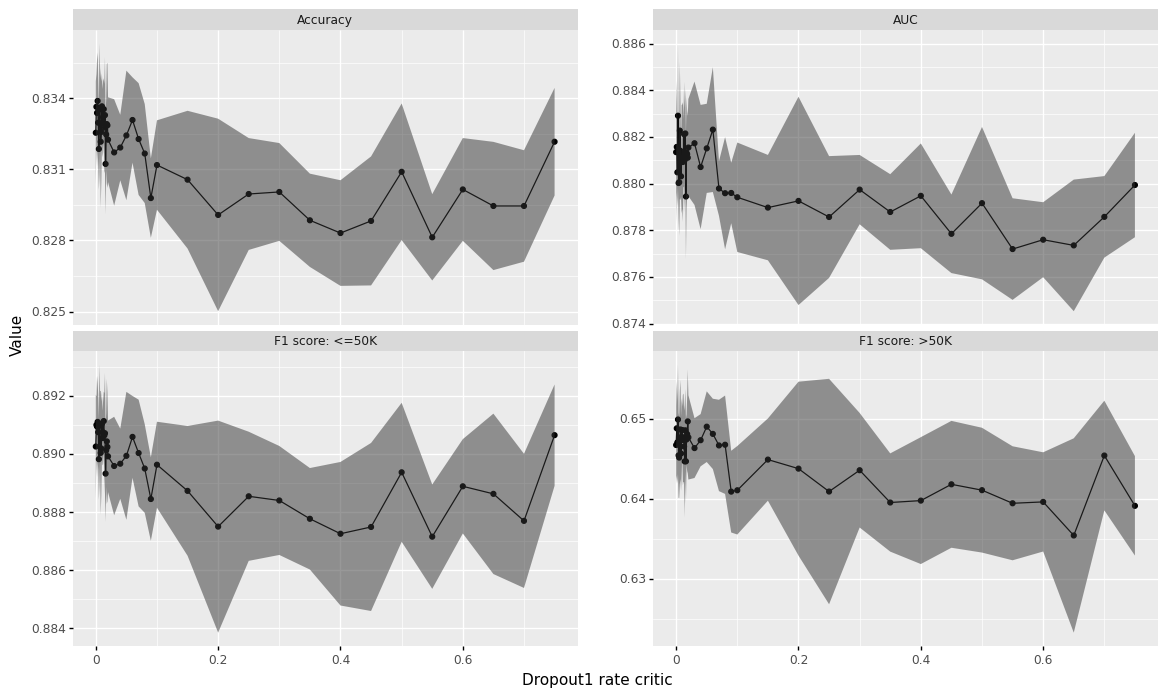

In [213]:
result_dropout1_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout1_rate_critic_vec,
    hyperparams_name = "dropout1_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout1_rate_critic_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dropout1_rate_critic.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [218]:
result_dropout1_rate_critic

,Dropout1 rate critic,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.000,0.832543,0.881353,0.768473,0.890255,0.646691,0.002171,0.003071,0.002620,0.001782,0.004827
1,0.001,0.833639,0.881577,0.769887,0.890998,0.648776,0.001375,0.001946,0.003042,0.000986,0.005909
2,0.002,0.833380,0.880487,0.768981,0.890944,0.647019,0.002250,0.001441,0.002904,0.001742,0.005120
3,0.003,0.833884,0.882917,0.770491,0.891103,0.649880,0.002042,0.003103,0.003786,0.001336,0.006831
4,0.004,0.832968,0.880029,0.768073,0.890749,0.645397,0.001816,0.001537,0.002962,0.001286,0.005312
5,0.005,0.831859,0.880064,0.767469,0.889822,0.645117,0.001726,0.002295,0.002611,0.001397,0.005030
6,0.006,0.833526,0.882278,0.769302,0.891016,0.647588,0.002785,0.002946,0.003550,0.002049,0.005799
7,0.007,0.833599,0.881414,0.769804,0.890977,0.648631,0.001662,0.002112,0.003256,0.001185,0.006184
8,0.008,0.832165,0.880315,0.767831,0.890037,0.645625,0.002792,0.000889,0.003014,0.002134,0.004655
9,0.009,0.832576,0.881053,0.768954,0.890189,0.647720,0.002133,0.002321,0.002814,0.001607,0.004830


In [214]:
dropout0_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout0_rate_critic_comparison = 10
n_epochs_dropout0_rate_critic = 100

def create_tabGAN_for_dropout0_rate_critic(dropout0_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[0], dropout_rate_critic=dropout0_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout0_rate_critic,
    hyperparams_vec=dropout0_rate_critic_vec,
    n_epochs=n_epochs_dropout0_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout0_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout0_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/400 [00:00<?, ?it/s]

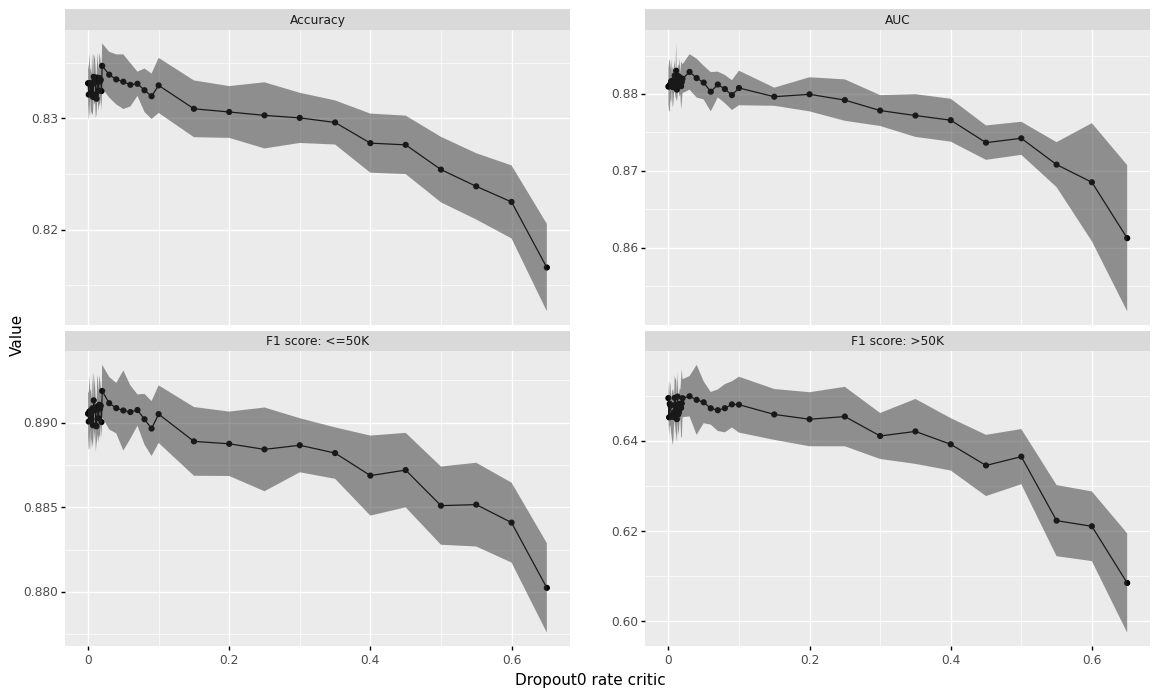

In [216]:
result_dropout0_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout0_rate_critic_vec,
    hyperparams_name = "dropout0_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout0_rate_critic_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_dropout0_rate_critic.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
)

In [217]:
result_dropout0_rate_critic

,Dropout0 rate critic,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.000,0.833167,0.880967,0.770034,0.890522,0.649546,0.001763,0.002307,0.002401,0.001308,0.004112
1,0.001,0.832145,0.881003,0.767668,0.890057,0.645279,0.002290,0.003292,0.002662,0.001685,0.004037
2,0.002,0.833181,0.881151,0.769471,0.890650,0.648293,0.002701,0.003363,0.002998,0.002104,0.004908
3,0.003,0.833167,0.881287,0.769278,0.890680,0.647875,0.001345,0.001900,0.002215,0.001161,0.004512
4,0.004,0.832317,0.881667,0.767909,0.890159,0.645659,0.002029,0.002831,0.001864,0.001811,0.003865
5,0.005,0.832344,0.881690,0.767906,0.890194,0.645617,0.001684,0.000928,0.002853,0.001147,0.005070
6,0.006,0.833074,0.880931,0.768107,0.890839,0.645376,0.002800,0.002673,0.003694,0.002065,0.006179
7,0.007,0.831939,0.880893,0.767729,0.889837,0.645621,0.001425,0.002209,0.002641,0.001312,0.005625
8,0.008,0.833738,0.881861,0.768874,0.891309,0.646439,0.002097,0.001754,0.002010,0.001657,0.003090
9,0.009,0.833413,0.882402,0.770162,0.890722,0.649602,0.002165,0.001967,0.002688,0.001760,0.004910


In [219]:
add_connection_vec = [(False, False), (True, False), (False, True)]
n_synthetic_datasets_add_connection_comparison = 100
n_epochs_add_connection = 100

def create_tabGAN_for_add_connection(add_connection_discrete_to_num, add_connection_num_to_discrete):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[0],
                   add_connection_discrete_to_num=add_connection_discrete_to_num,
                   add_connection_num_to_discrete=add_connection_num_to_discrete)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_add_connection,
    hyperparams_vec=add_connection_vec,
    n_epochs=n_epochs_add_connection,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_add_connection_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "add_connection",
    hyperparams_subname=["discrete_to_num", "num_to_discrete"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/300 [00:00<?, ?it/s]

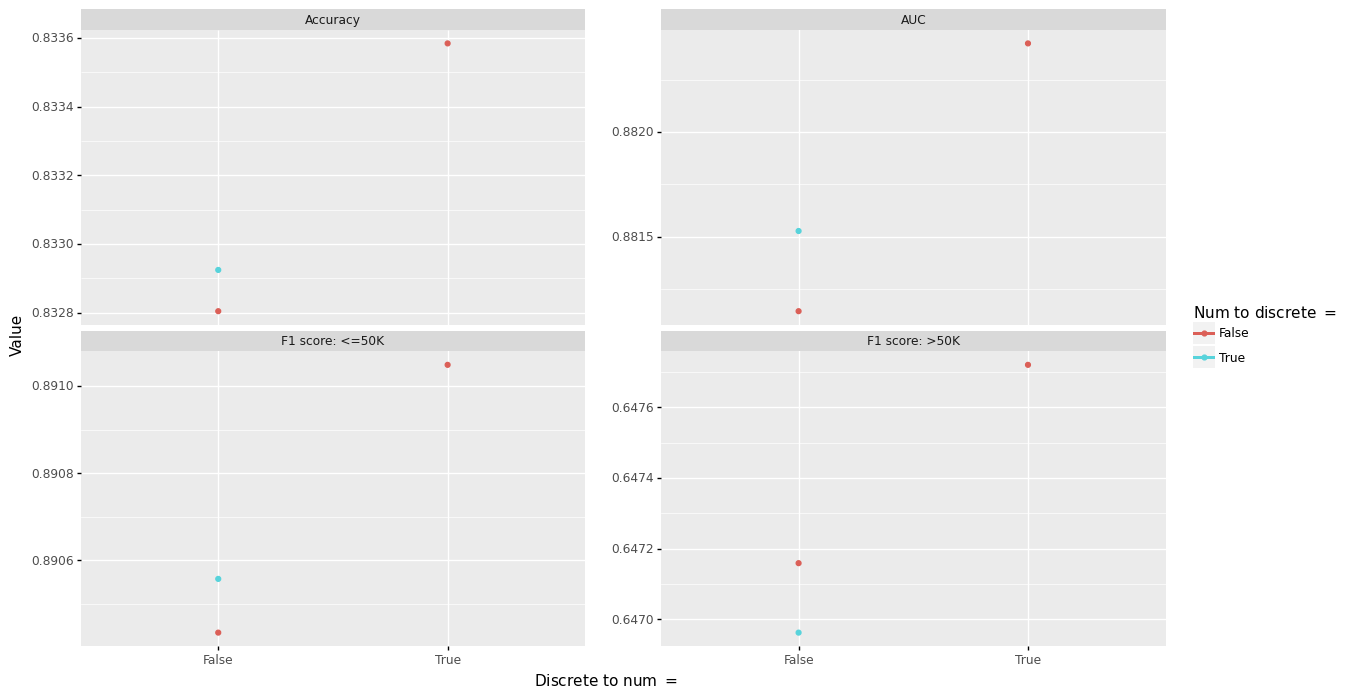

In [223]:
result_add_connection = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=add_connection_vec,
    hyperparams_name = "add_connection",
    hyperparams_subname=["discrete_to_num", "num_to_discrete"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_add_connection_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_add_connection.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_add_connection

In [224]:
tf_data_use_vec = [False, True]
n_synthetic_datasets_tf_data_use_comparison = 25
n_epochs_tf_data_use = 100

def create_tabGAN_for_tf_data_use(tf_data_use):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    tf_data_use=tf_data_use)
    return tg_qtr

  0%|          | 0/50 [00:00<?, ?it/s]

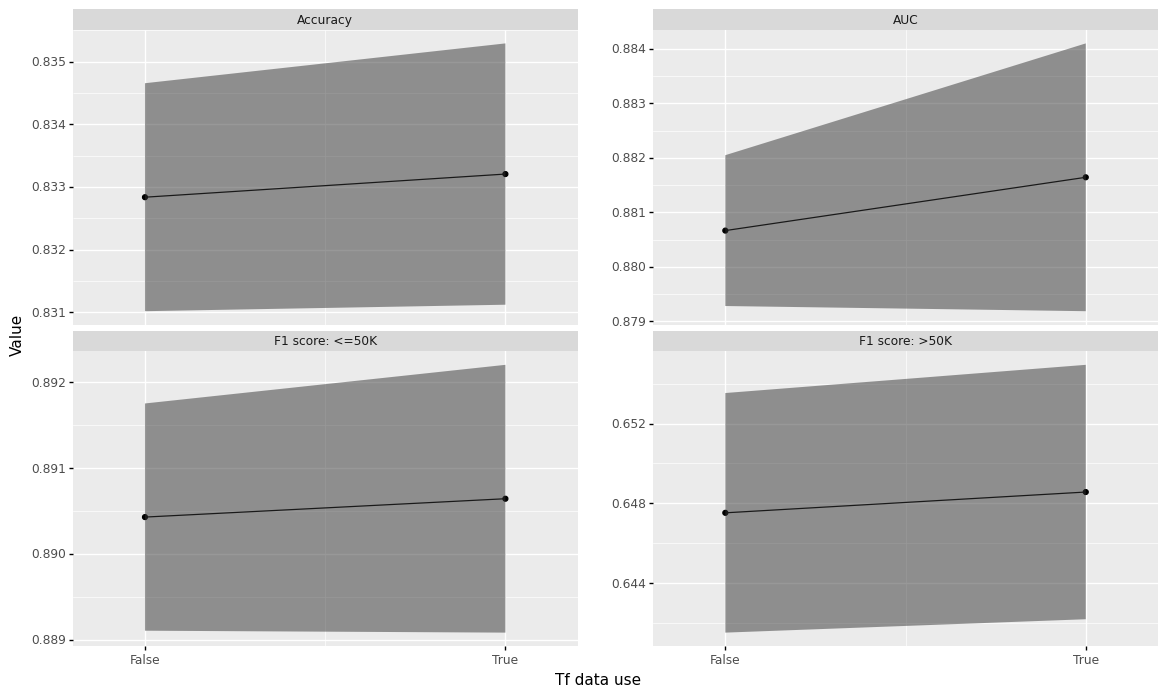

In [265]:
result_tf_data_use = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=tf_data_use_vec,
    hyperparams_name = "tf_data_use",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_tf_data_use_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_tf_data_use.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [226]:
result_tf_data_use

,Tf data use,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,0.832837,0.880665,0.768978,0.890429,0.647527,0.001818,0.001383,0.003221,0.001326,0.006006
1,True,0.833206,0.881642,0.769606,0.890643,0.648569,0.002084,0.002455,0.003434,0.001562,0.006378


In [227]:
batch_size_but_constant_iterations_vec = [100, 250, 500, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_but_constant_iterations_comparison = 10

def create_tabGAN_for_batch_size_but_constant_iterations(batch_size):
    import math
    n_epochs = int(math.ceil(100 * batch_size / 500))
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    batch_size=batch_size,
                   default_epochs_to_train=n_epochs)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size_but_constant_iterations,
    hyperparams_vec=batch_size_but_constant_iterations_vec,
    n_epochs=None,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_but_constant_iterations_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size_but_constant_iterations",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/60 [00:00<?, ?it/s]

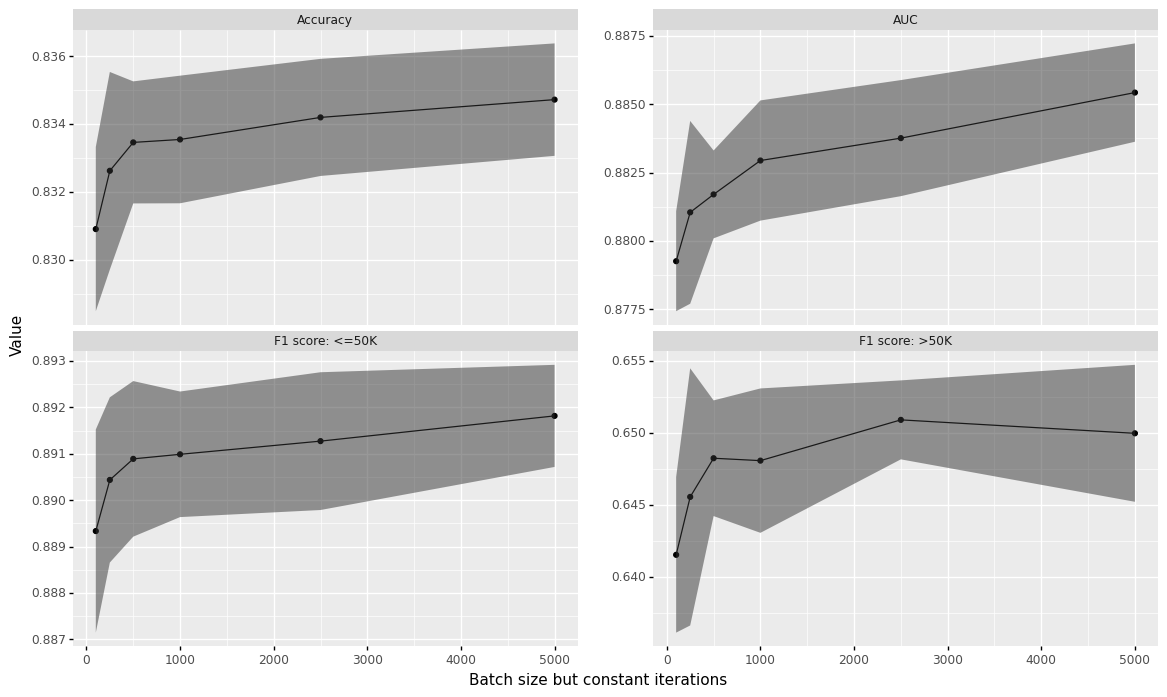

In [228]:
result_batch_size_but_constant_iterations = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_but_constant_iterations_vec,
    hyperparams_name = "batch_size_but_constant_iterations",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_but_constant_iterations_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_batch_size_but_constant_iterations.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [229]:
result_batch_size_but_constant_iterations

,Batch size but constant iterations,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,100,0.830903,0.879256,0.765433,0.889334,0.641531,0.002421,0.001829,0.002596,0.002189,0.005405
1,250,0.832623,0.881044,0.767996,0.890437,0.645555,0.002914,0.003344,0.005173,0.001781,0.008932
2,500,0.833459,0.881699,0.769566,0.890890,0.648241,0.001800,0.001607,0.001799,0.001677,0.004017
3,1000,0.833546,0.882939,0.769531,0.890989,0.648074,0.001882,0.002199,0.002854,0.001353,0.005016
4,2500,0.834197,0.883758,0.771090,0.891273,0.650907,0.001727,0.002123,0.001501,0.001485,0.002743
5,5000,0.834721,0.885425,0.770895,0.891817,0.649972,0.001658,0.001799,0.002747,0.001101,0.004758


In [266]:
max_quantile_share_vec = np.round(np.arange(0.3, 1.01, 0.05), 2).tolist()
n_synthetic_datasets_max_quantile_share_comparison = 100
n_epochs_max_quantile_share = 100

def create_tabGAN_for_max_quantile_share(max_quantile_share):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    max_quantile_share=max_quantile_share)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_max_quantile_share,
    hyperparams_vec=max_quantile_share_vec,
    n_epochs=n_epochs_max_quantile_share,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_max_quantile_share_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "max_quantile_share",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/1500 [00:00<?, ?it/s]

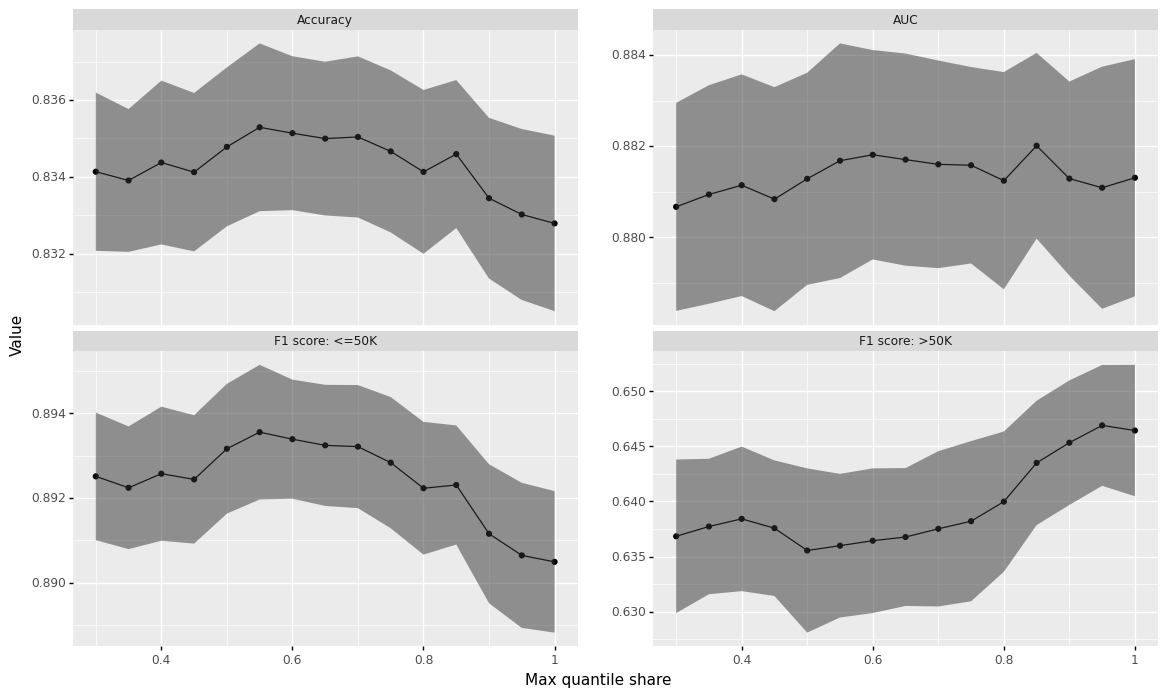

In [267]:
result_max_quantile_share = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=max_quantile_share_vec,
    hyperparams_name = "max_quantile_share",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_max_quantile_share_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_max_quantile_share.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_observations=False
)

In [232]:
result_max_quantile_share

,Max quantile share,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.30,0.834133,0.880666,0.764676,0.892511,0.636841,0.002059,0.002283,0.003704,0.001506,0.006963
1,0.35,0.833906,0.880937,0.764986,0.892242,0.637730,0.001857,0.002399,0.003183,0.001447,0.006140
2,0.40,0.834373,0.881141,0.765499,0.892574,0.638423,0.002131,0.002433,0.003530,0.001582,0.006550
3,0.45,0.834122,0.880834,0.765008,0.892439,0.637576,0.002061,0.002459,0.003345,0.001515,0.006146
4,0.50,0.834780,0.881282,0.764358,0.893162,0.635554,0.002067,0.002328,0.003890,0.001531,0.007443
5,0.55,0.835289,0.881678,0.764774,0.893554,0.635993,0.002183,0.002575,0.003559,0.001588,0.006509
6,0.60,0.835135,0.881810,0.764915,0.893388,0.636442,0.002002,0.002298,0.003569,0.001405,0.006558
7,0.65,0.834995,0.881703,0.765009,0.893242,0.636777,0.002000,0.002328,0.003411,0.001429,0.006248
8,0.70,0.835038,0.881599,0.765367,0.893213,0.637521,0.002096,0.002279,0.003828,0.001452,0.007038
9,0.75,0.834662,0.881579,0.765522,0.892834,0.638210,0.002108,0.002156,0.003841,0.001548,0.007260


In [234]:
max_quantile_share_partial = np.round(np.arange(0.3, 1.01, 0.1), 2).tolist()
qtr_spread_vec_partial = np.round(np.arange(0, 1.01, 0.2), 2).tolist() + [0.9]
qt_params_vec = [(max_share, qtr_spread)
                        for max_share in max_quantile_share_partial
                        for qtr_spread in qtr_spread_vec_partial]
n_synthetic_datasets_qt_params_comparison = 25
n_epochs_qt_params = 100

def create_tabGAN_for_qt_params(max_quantile_share, qtr_spread):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    qtr_spread=qtr_spread, max_quantile_share=max_quantile_share)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qt_params,
    hyperparams_vec=qt_params_vec,
    n_epochs=n_epochs_qt_params,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qt_params_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qt_params",
    hyperparams_subname = ["max_quantile_share", "qtr_spread"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/1400 [00:00<?, ?it/s]

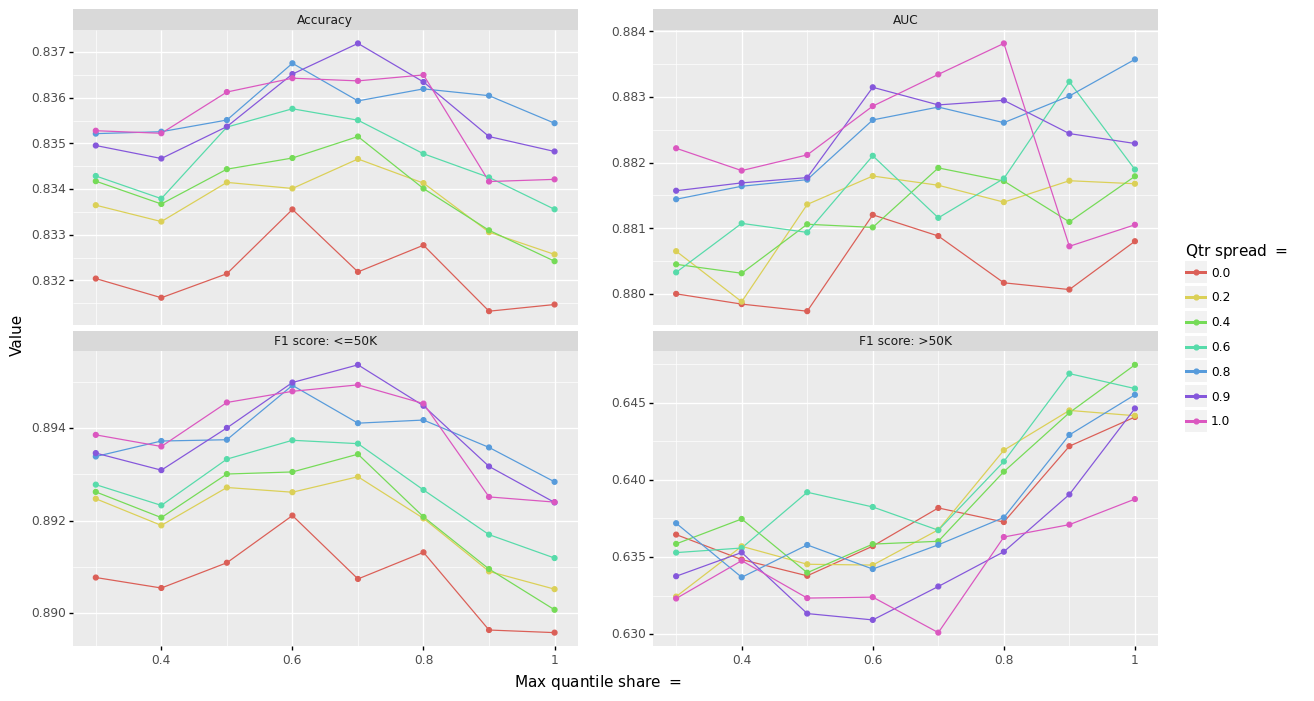

In [235]:
result_qt_params = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qt_params_vec,
    hyperparams_name = "qt_params",
    hyperparams_subname = ["max_quantile_share", "qtr_spread"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qt_params_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_qt_params.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    drop_na=False,
    report_na=False,
)

In [ ]:
result_qt_params

In [236]:
ctgan_vec = [(False, False, False, False)]
ctgan_vec += [(bin_loss, True, log_freq, add_connection)
             for bin_loss in [False, True]
             for log_freq in [False, True]
             for add_connection in [False, True]]
n_synthetic_datasets_ctgan_comparison = 25
n_epochs_ctgan = 100

def create_tabGAN_for_ctgan(ctgan, ctgan_log_frequency, ctgan_binomial_loss, add_connection_query_to_discrete):
    if ctgan:
        tf_data_use=False
    else:
        tf_data_use=True
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max, tf_data_use=tf_data_use,
                   ctgan=ctgan, ctgan_log_frequency=ctgan_log_frequency,
                    ctgan_binomial_loss=ctgan_binomial_loss,
                   add_connection_query_to_discrete=add_connection_query_to_discrete)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_ctgan,
    hyperparams_vec=ctgan_vec,
    n_epochs=n_epochs_ctgan,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_ctgan_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "categorical_query",
    hyperparams_subname=["ctgan_binomial_loss", "ctgan", "log_frequency", "add_connection_query_to_discrete"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

In [ ]:
result_ctgan = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=ctgan_vec,
    hyperparams_name = "categorical_query",
    hyperparams_subname=[ "ctgan_binomial_loss", "ctgan", "log_frequency", "add_connection_query_to_discrete"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_ctgan_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_ctgan.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_ctgan

In [268]:
gan_algorithms_partial_vec = ["WGAN-GP", "WGAN-SGP"]
wgan_lambda_partial_vec = [4, 6, 8, 10, 12, 14]
gan_method_vec = [(wgan_lambda, algorithm)
                  for wgan_lambda in wgan_lambda_partial_vec
                  for algorithm in gan_algorithms_partial_vec
                 ]
n_synthetic_datasets_gan_method_comparison = 10
n_epochs_gan_method = 100

def create_tabGAN_for_gan_method(wgan_lambda, gan_method):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max, tf_data_use=True,
                   gan_method=gan_method, wgan_lambda=wgan_lambda)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gan_method,
    hyperparams_vec=gan_method_vec,
    hyperparams_name = "gan_method",
    hyperparams_subname=["lambda", "algorithm"],
    n_epochs=n_epochs_gan_method,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gan_method_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/120 [00:00<?, ?it/s]

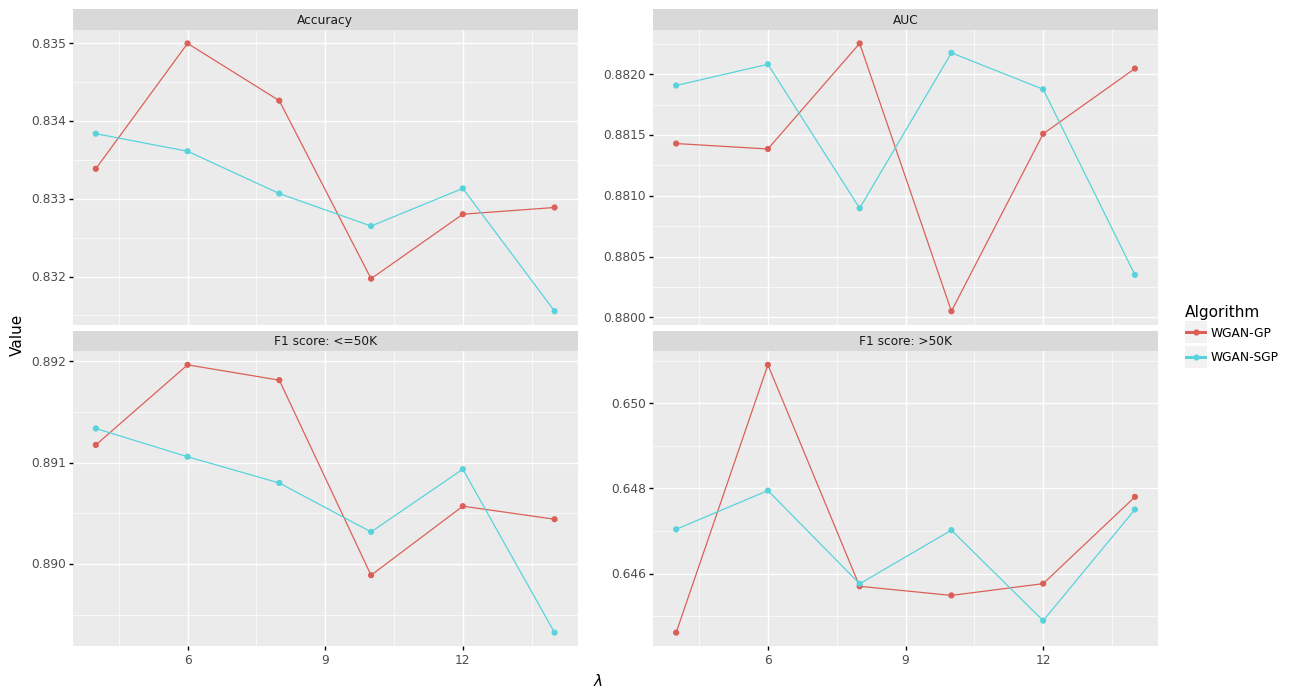

In [270]:
result_gan_method = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gan_method_vec,
    hyperparams_name = "gan_method",
    hyperparams_subname=["lambda", "algorithm"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gan_method_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_gan_method.svg",
    legend_title = [r"$\lambda$", "Algorithm"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
)

In [271]:
result_gan_method

,$\lambda$,Algorithm,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,4,WGAN-GP,0.833386,0.881430,0.767897,0.891175,0.644620,0.002116,0.002676,0.002703,0.001710,0.005019
1,4,WGAN-SGP,0.833838,0.881908,0.769190,0.891337,0.647042,0.001784,0.002230,0.002100,0.001411,0.003626
2,6,WGAN-GP,0.835000,0.881386,0.771432,0.891966,0.650899,0.001434,0.002444,0.001982,0.001132,0.003644
3,6,WGAN-SGP,0.833612,0.882083,0.769504,0.891058,0.647951,0.002078,0.002197,0.002374,0.001586,0.003814
4,8,WGAN-GP,0.834263,0.882254,0.768760,0.891814,0.645706,0.002176,0.002239,0.003095,0.001849,0.006141
5,8,WGAN-SGP,0.833068,0.880898,0.768282,0.890799,0.645764,0.003331,0.002434,0.003293,0.002517,0.004437
6,10,WGAN-GP,0.831972,0.880051,0.767690,0.889888,0.645492,0.002603,0.002013,0.003675,0.001775,0.005931
7,10,WGAN-SGP,0.832649,0.882177,0.768669,0.890316,0.647022,0.002903,0.002450,0.003375,0.002231,0.005506
8,12,WGAN-GP,0.832802,0.881511,0.768169,0.890570,0.645768,0.002386,0.003352,0.004035,0.001582,0.007068
9,12,WGAN-SGP,0.833134,0.881877,0.767918,0.890935,0.644900,0.001233,0.002110,0.001908,0.001119,0.004051


In [273]:
real_data_sampling_vec = [(False, False), (False, True), (True, False)]
n_synthetic_datasets_real_data_sampling_comparison = 100
n_epochs_real_data_sampling = 100

def create_tabGAN_for_real_data_sampling(tf_data_use, np_data_fix):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max, tf_data_use=tf_data_use,
                   np_data_fix=np_data_fix)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_real_data_sampling,
    hyperparams_vec=real_data_sampling_vec,
    n_epochs=n_epochs_real_data_sampling,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_real_data_sampling_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "real_data_sampling",
    hyperparams_subname=["tf_data_use", "np_data_fix"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/300 [00:00<?, ?it/s]

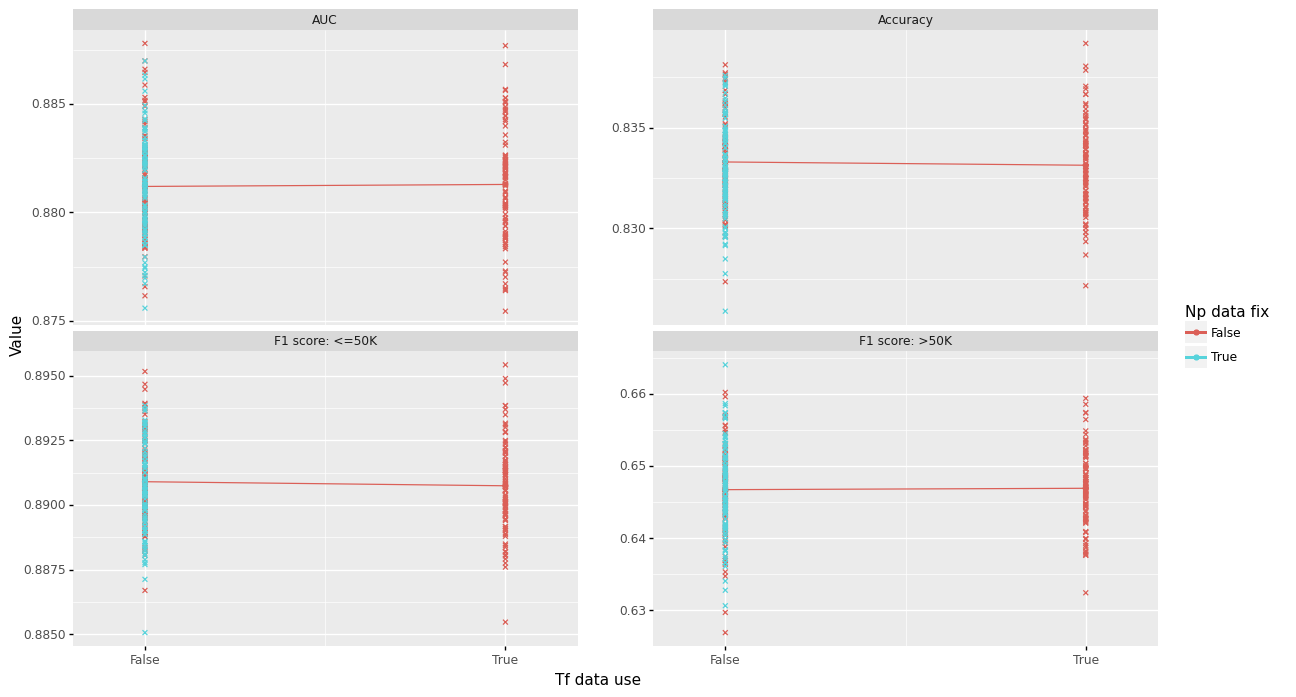

In [304]:
result_real_data_sampling = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=real_data_sampling_vec,
    hyperparams_name = "real_data_sampling",
    hyperparams_subname=["tf_data_use", "np_data_fix"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_real_data_sampling_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_real_data_sampling.svg",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_observations=True
)

In [305]:
result_real_data_sampling

,Tf data use,Np data fix,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,False,0.833297,0.881192,0.768813,0.890899,0.646726,0.002118,0.002287,0.003230,0.001608,0.005926
1,0,True,0.832913,0.881243,0.768596,0.890581,0.646611,0.002235,0.002267,0.003420,0.001676,0.006217
2,1,False,0.833135,0.881284,0.768829,0.890742,0.646916,0.002158,0.002503,0.002822,0.001713,0.005130


In [308]:
activation_function_vec = [("LeakyReLU", False), ("GELU", False), ("GELU", True)]
activation_function_vec += [(function, False) for function in ["SquaredReLU", "ELU", "Swish", "ReLU", "SELU"]]
n_synthetic_datasets_activation_function_comparison = 35
n_epochs_activation_function = 100

def create_tabGAN_for_activation_function(activation_function, approximate):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max, tf_data_use=True,
                   activation_function=activation_function, gelu_approximate=approximate)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_activation_function,
    hyperparams_vec=activation_function_vec,
    n_epochs=n_epochs_activation_function,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_activation_function_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "activation",
    hyperparams_subname=["function", "approximate"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/280 [00:00<?, ?it/s]

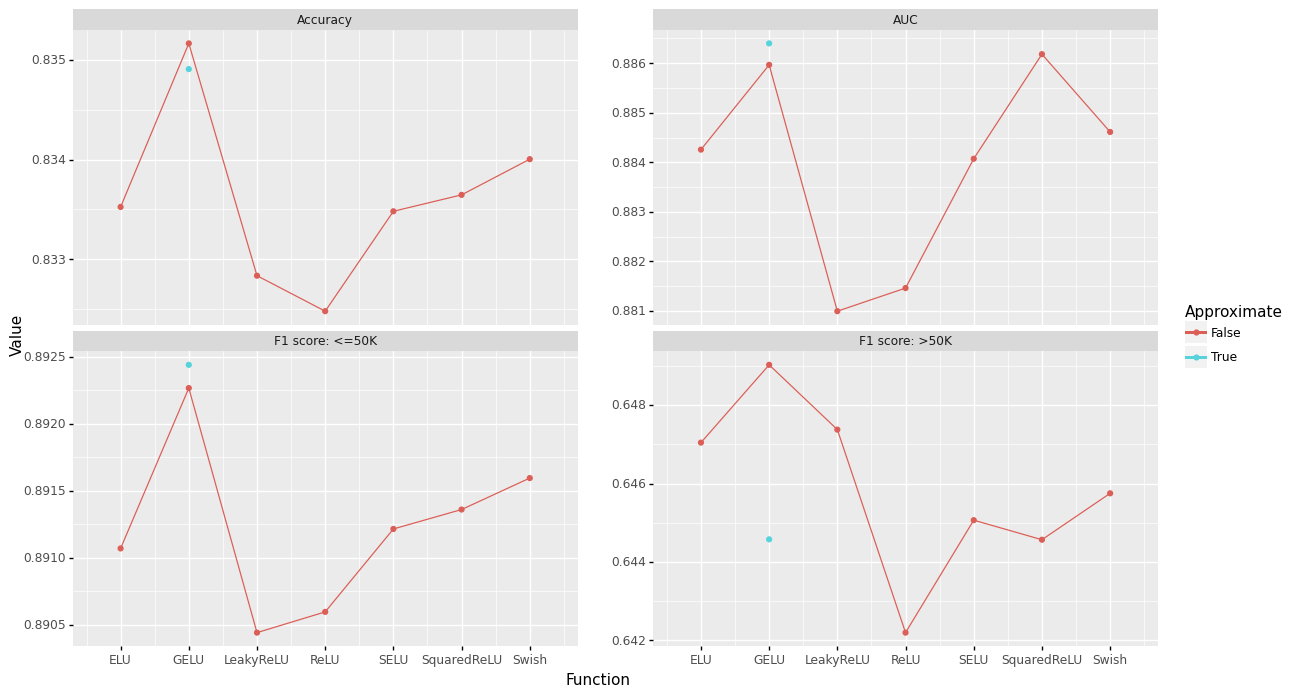

In [319]:
result_activation_function = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=activation_function_vec,
    hyperparams_name = "activation",
    hyperparams_subname=["function", "approximate"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_activation_function_comparison,
    save_dir = const.dir.images_hp(),
    save_path = "predictive_performance_against_activation_function.svg",
    x_scale="linear",
    label_x_axis="Activation function",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [320]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,False,0.833525,0.884257,0.769056,0.891068,0.647043,0.002036,0.002197,0.002853,0.001514,0.004977
1,1,False,0.835168,0.885968,0.770645,0.892265,0.649025,0.002476,0.002816,0.005183,0.001859,0.010099
2,1,True,0.834910,0.886401,0.768508,0.892439,0.644577,0.002005,0.002262,0.006827,0.001485,0.013878
3,2,False,0.832834,0.880996,0.768907,0.890440,0.647374,0.001898,0.002256,0.002851,0.001529,0.005441
4,3,False,0.832478,0.881463,0.766397,0.890595,0.642200,0.002405,0.002792,0.004662,0.002254,0.010021
5,4,False,0.833481,0.884073,0.768140,0.891214,0.645066,0.002321,0.002597,0.003568,0.001727,0.006470
6,5,False,0.833646,0.886184,0.767963,0.891359,0.644568,0.002758,0.003032,0.006891,0.002231,0.013931
7,6,False,0.834005,0.884614,0.768672,0.891594,0.645750,0.001962,0.002271,0.003361,0.001546,0.006507
